# Titanic Survivor

## Bharat Intern Task 

## - By Sakshi Jain

### Task 2: Titanic classification
Link to the Dataset-https://www.kaggle.com/code/sakshijain27/titanic-survivors/input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from scikitplot.metrics import plot_confusion_matrix,plot_roc
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/kaggle/input/titanic-train/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df['Age'].fillna(df["Age"].mean(), inplace=True)

In [13]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df['Survived'].unique()

array([0, 1])

In [17]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

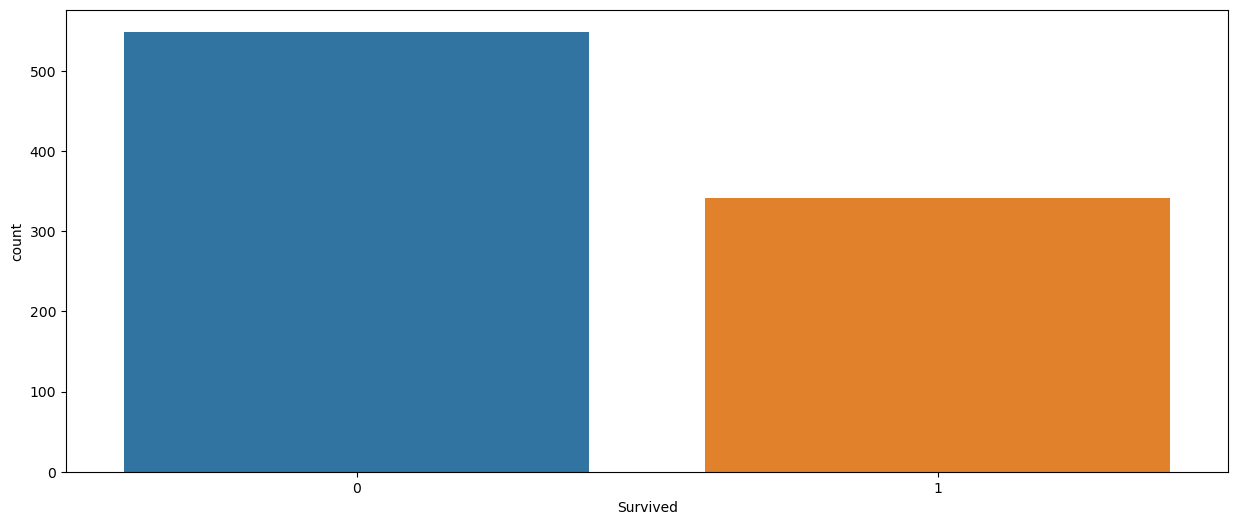

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Survived'])
plt.show()

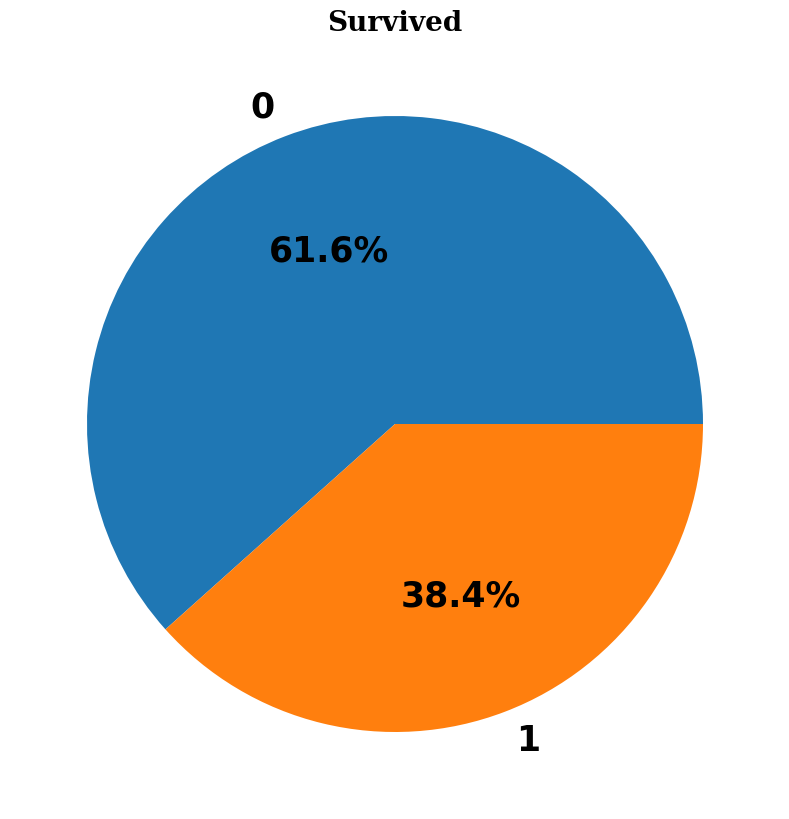

In [19]:
plt.figure(figsize=(15,10))
plt.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%',textprops={'fontsize':25,
                                                                                                              'color':'black',
                                                                                                              'weight':'bold',
                                                                                                              'family':'sans-serif'})
hfont={'fontname':'serif','weight':'bold'}
plt.title('Survived',size=20,**hfont)
plt.show()

In [20]:
df['Pclass'].unique()

array([3, 1, 2])

In [21]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

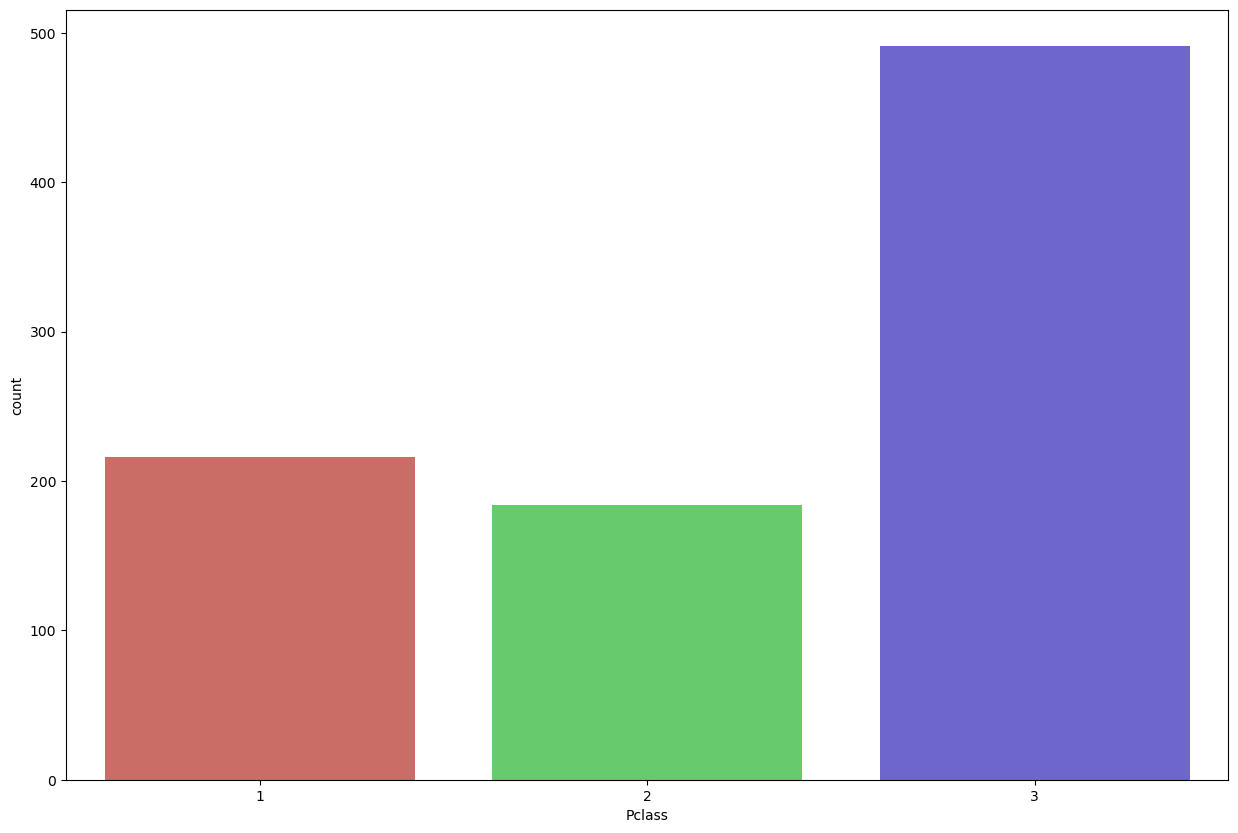

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Pclass'],palette='hls')
plt.show()

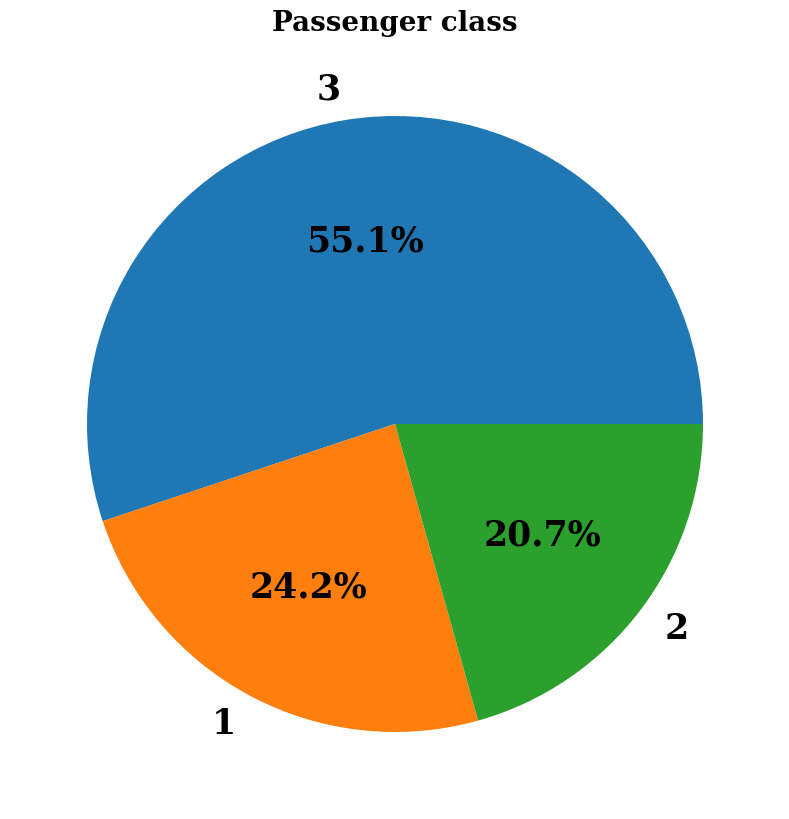

In [23]:
plt.figure(figsize=(15,10))
plt.pie(df['Pclass'].value_counts(), labels=df['Pclass'].value_counts().index, autopct='%1.1f%%',textprops={'fontsize':25,
                                                                                                              'color':'black',
                                                                                                              'weight':'bold',
                                                                                                              'family':'serif'})
hfont={'fontname':'serif','weight':'bold'}
plt.title('Passenger class',size=20,**hfont)
plt.show()

In [24]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

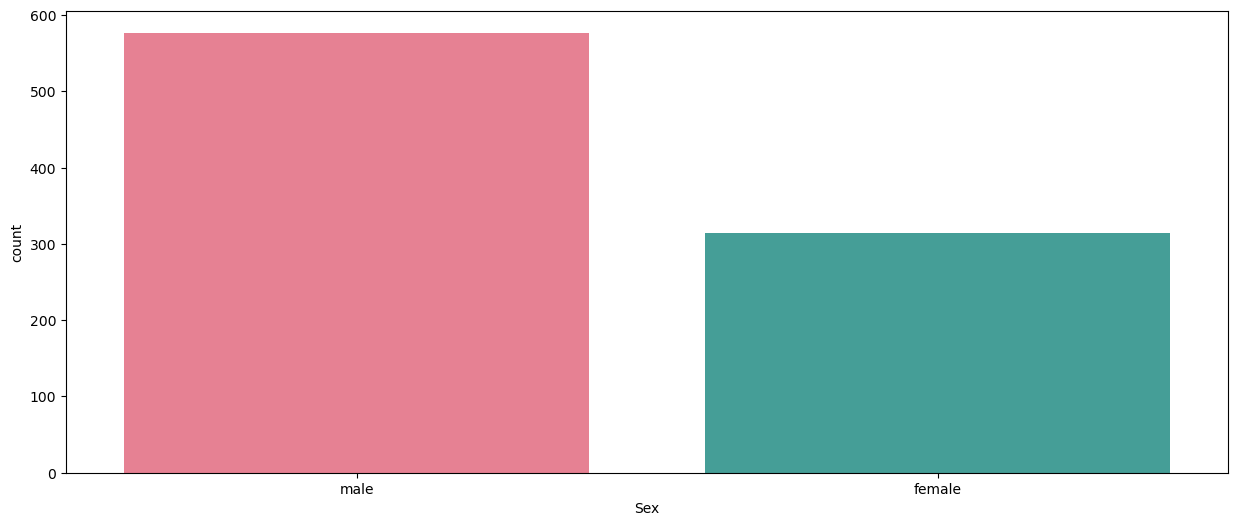

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Sex'],palette='husl')
plt.show()

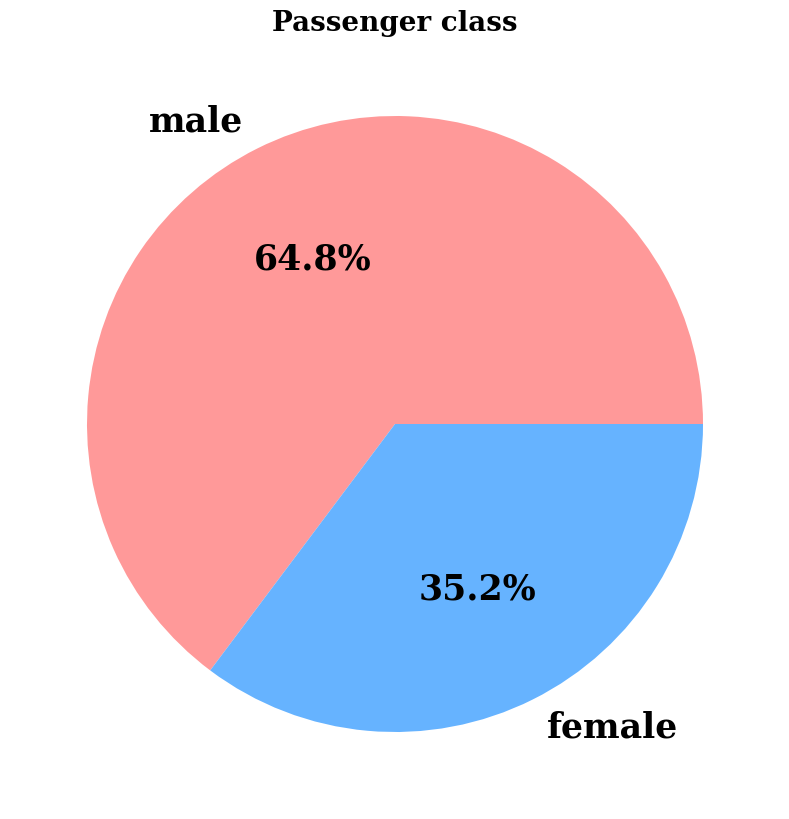

In [27]:
plt.figure(figsize=(15,10))
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%',textprops={'fontsize':25,
                                                                                                              'color':'black',
                                                                                                              'weight':'bold',
                                                                                                              'family':'serif'},colors={'#ff9999','#66b3ff'})
hfont={'fontname':'serif','weight':'bold'}
plt.title('Passenger class',size=20,**hfont)
plt.show()

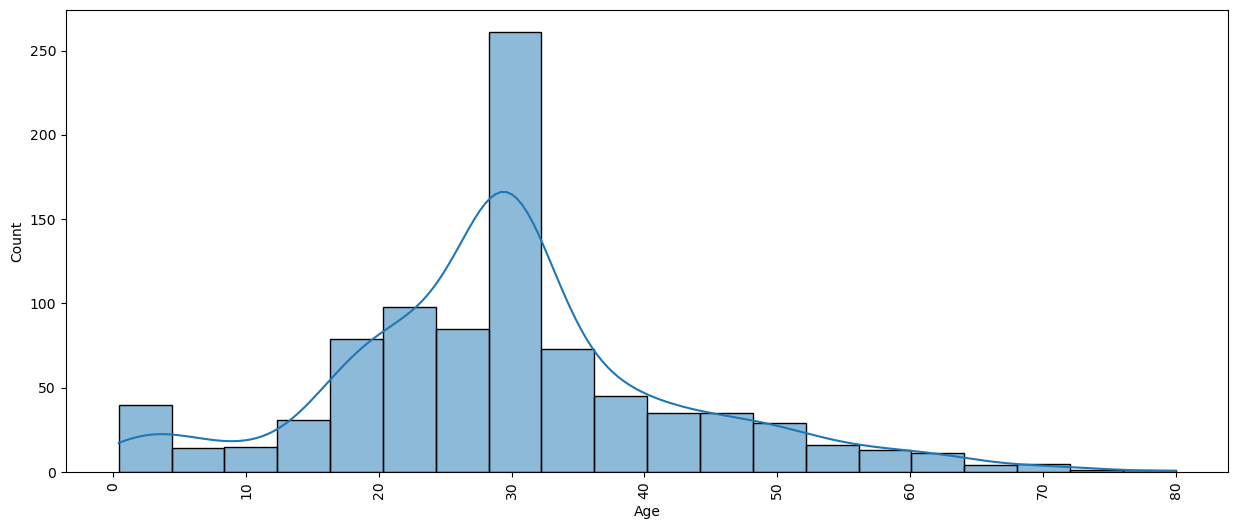

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(df['Age'], kde=True, bins=20, palette='husl')
plt.xticks(rotation=90)
plt.show()

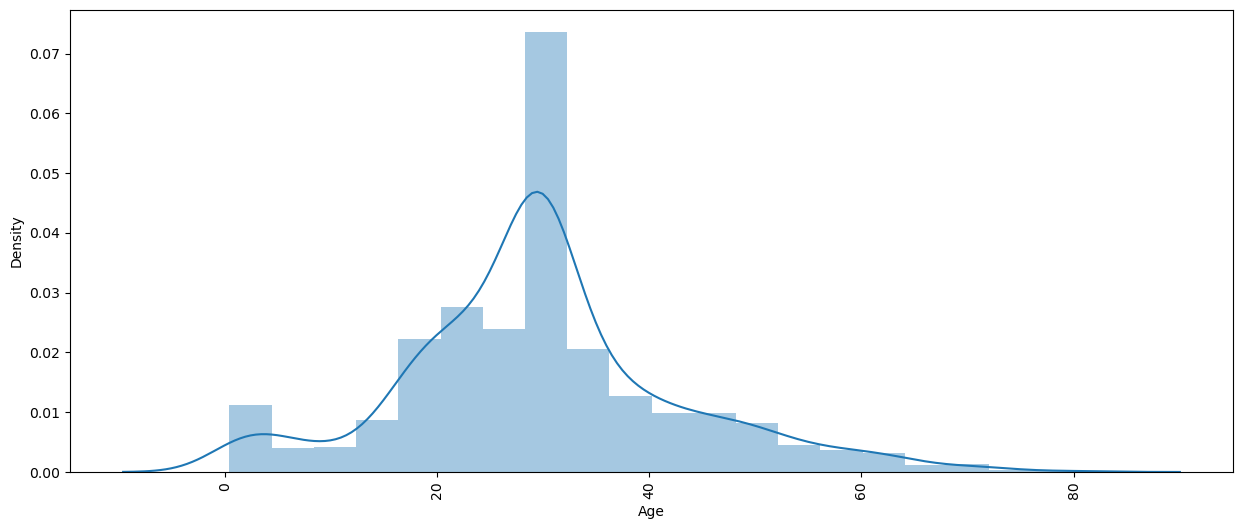

In [29]:
plt.figure(figsize=(15,6))
sns.distplot(df['Age'], kde=True, bins=20)
plt.xticks(rotation=90)
plt.show()

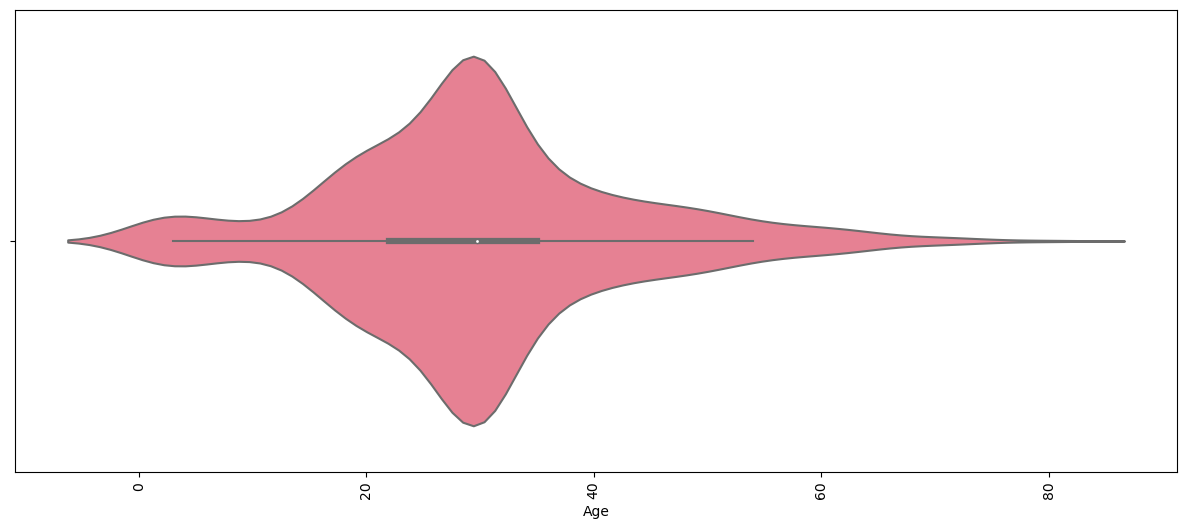

In [30]:
plt.figure(figsize=(15,6))
sns.violinplot(x=df['Age'],palette='husl')
plt.xticks(rotation=90)
plt.show()

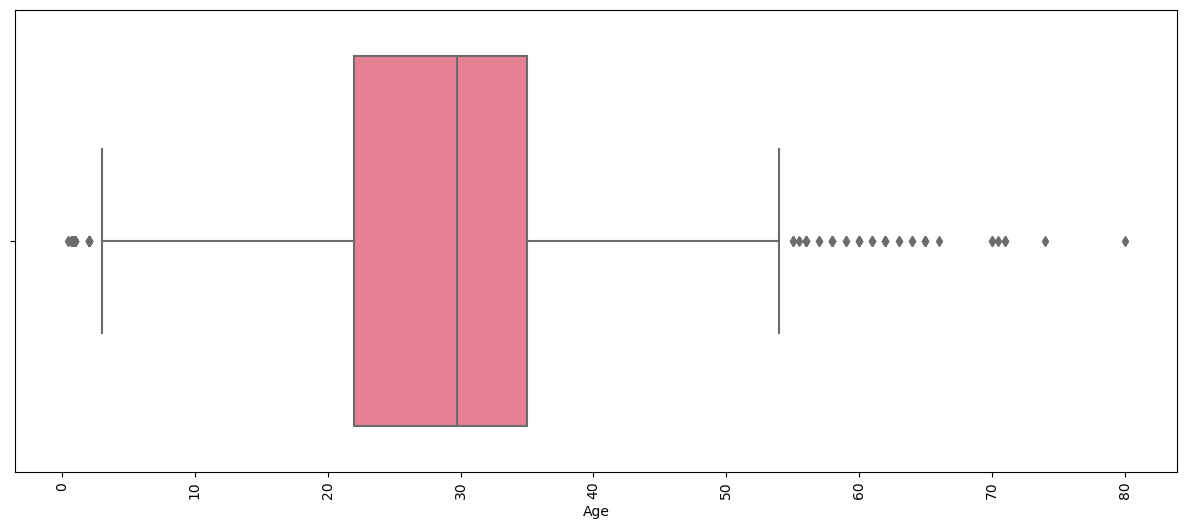

In [31]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Age'], x=df['Age'], palette='husl')
plt.xticks(rotation=90)
plt.show()

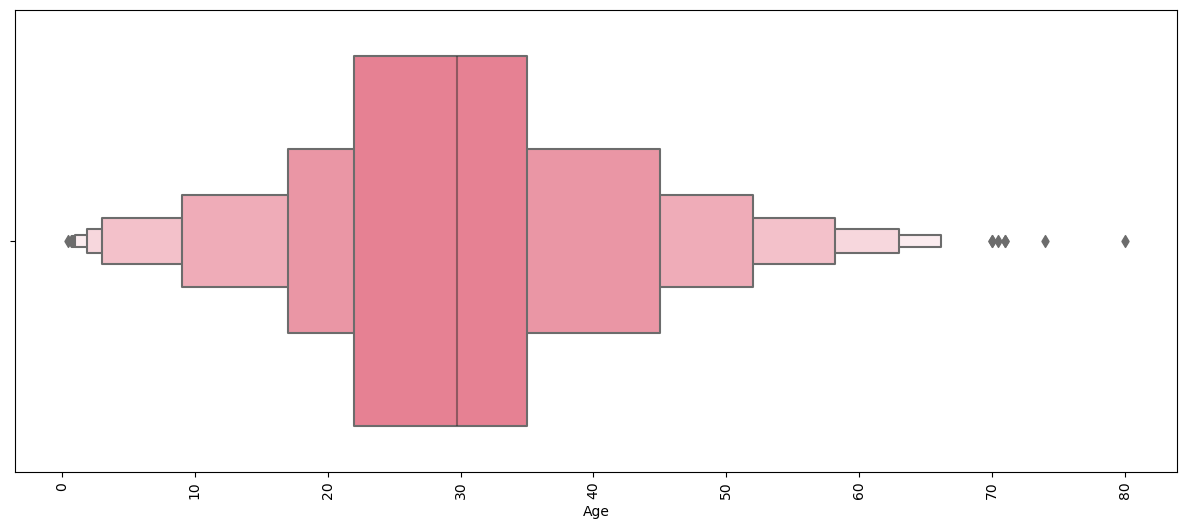

In [32]:
plt.figure(figsize=(15,6))
sns.boxenplot(df['Age'], x=df['Age'], palette='husl')
plt.xticks(rotation=90)
plt.show()

In [33]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [34]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

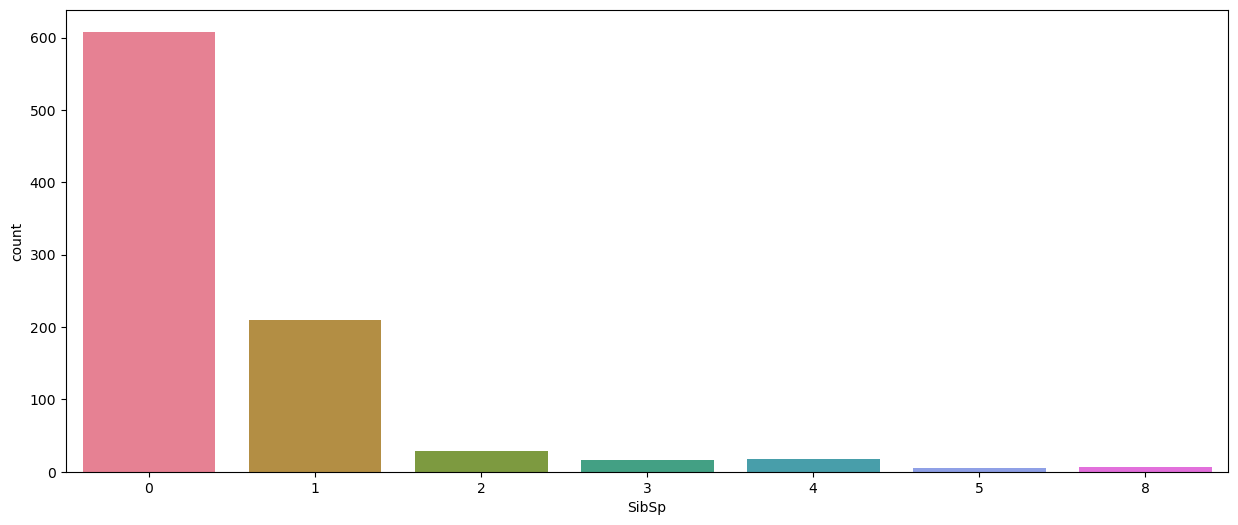

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['SibSp'],palette='husl')
plt.show()

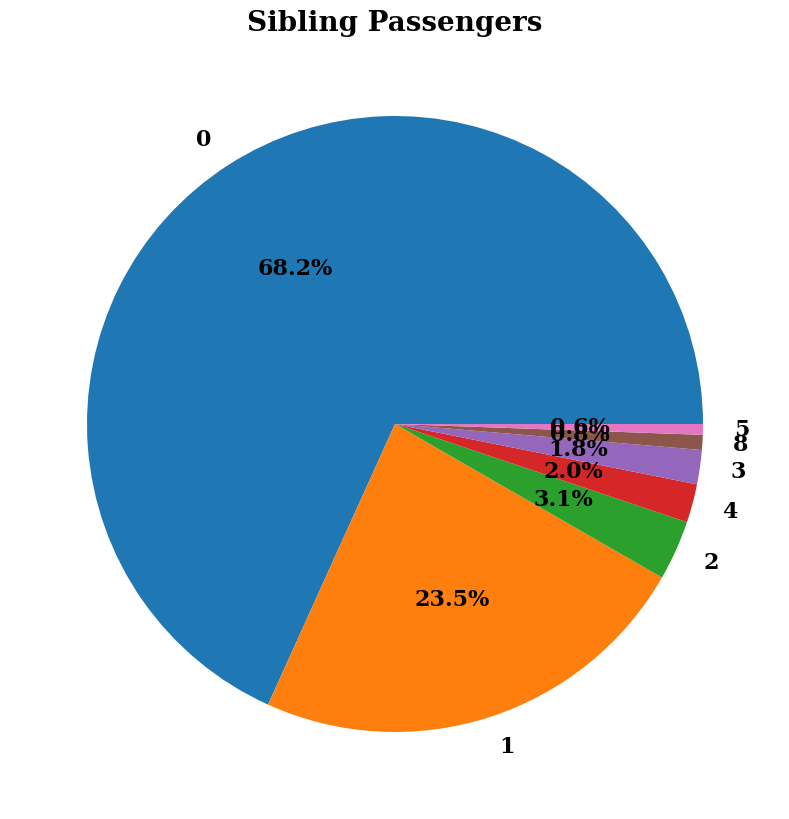

In [36]:
plt.figure(figsize=(15,10))
plt.pie(df['SibSp'].value_counts(), labels=df['SibSp'].value_counts().index, autopct='%1.1f%%',textprops={'fontsize':16,
                                                                                                              'color':'black',
                                                                                                              'weight':'bold',
                                                                                                              'family':'serif'})
hfont={'fontname':'serif','weight':'bold'}
plt.title('Sibling Passengers',size=20,**hfont)
plt.show()

In [37]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [38]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

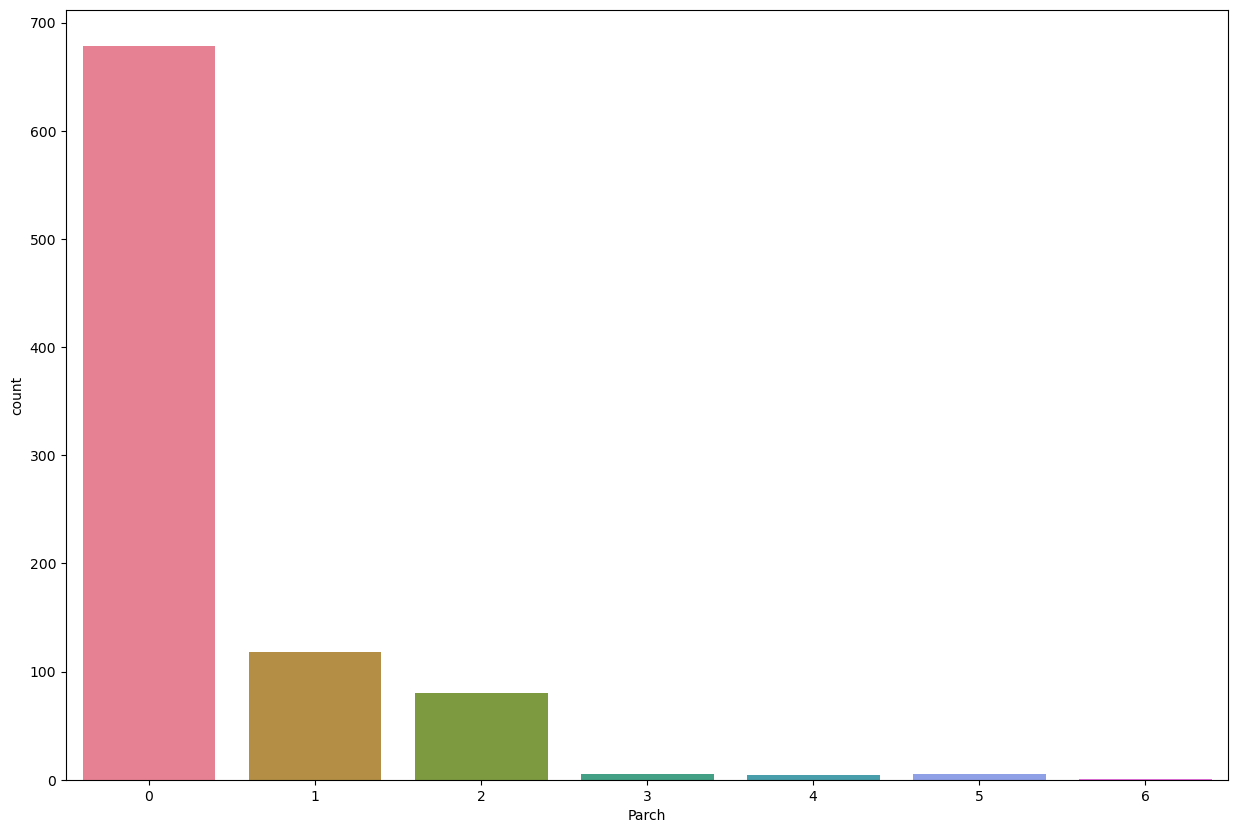

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Parch'],palette='husl')
plt.show()

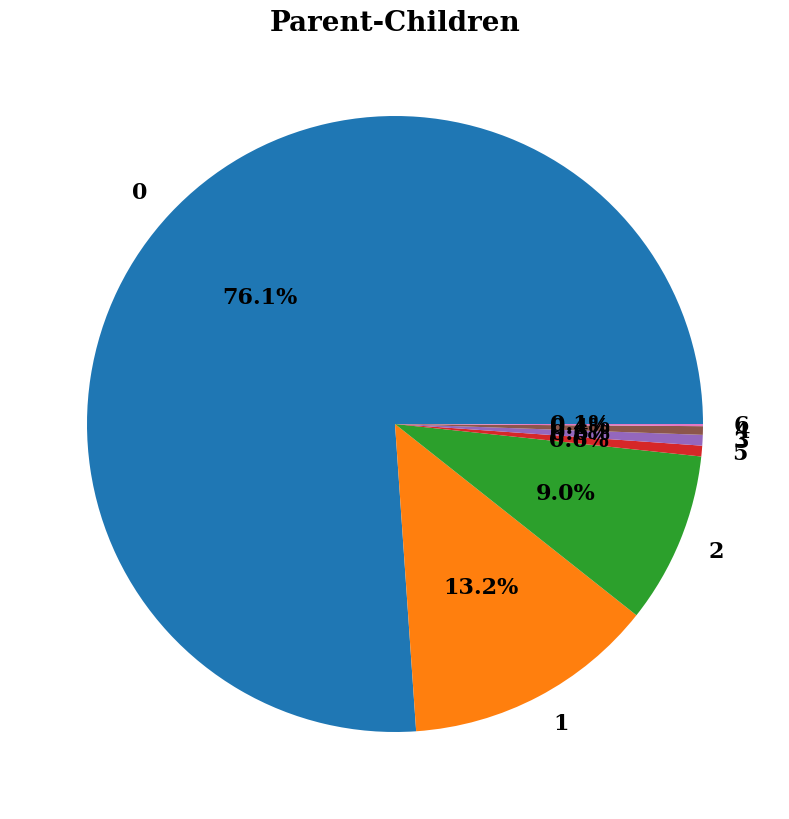

In [40]:
plt.figure(figsize=(15,10))
plt.pie(df['Parch'].value_counts(), labels=df['Parch'].value_counts().index, autopct='%1.1f%%',textprops={'fontsize':16,
                                                                                                              'color':'black',
                                                                                                              'weight':'bold',
                                                                                                              'family':'serif'})
hfont={'fontname':'serif','weight':'bold'}
plt.title('Parent-Children',size=20,**hfont)
plt.show()

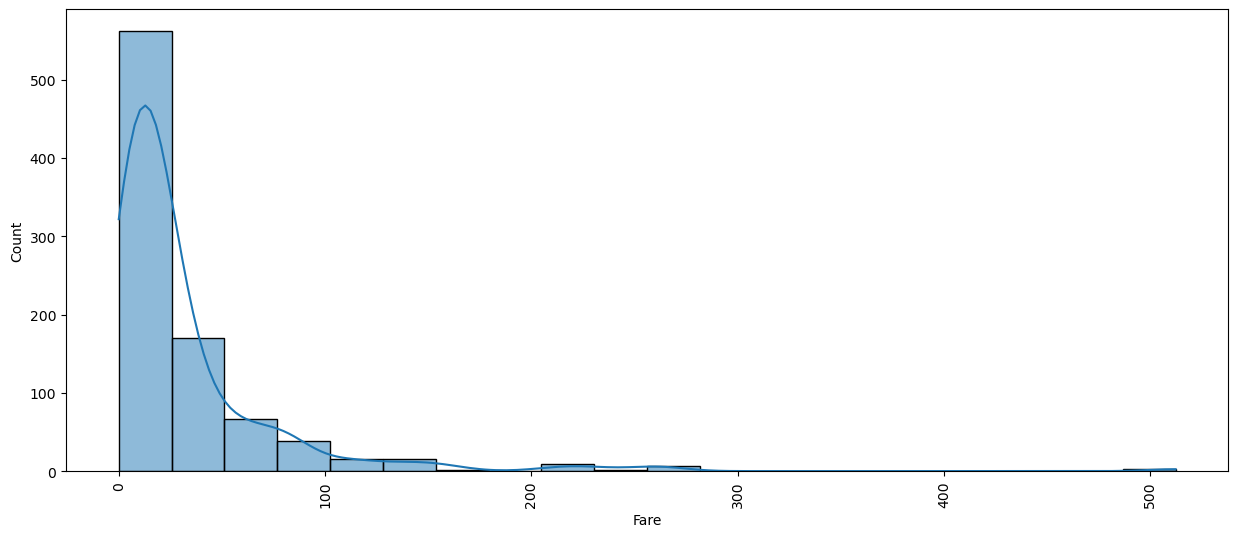

In [41]:
plt.figure(figsize=(15,6))
sns.histplot(df['Fare'],kde=True, bins=20, palette='husl')
plt.xticks(rotation=90)
plt.show()

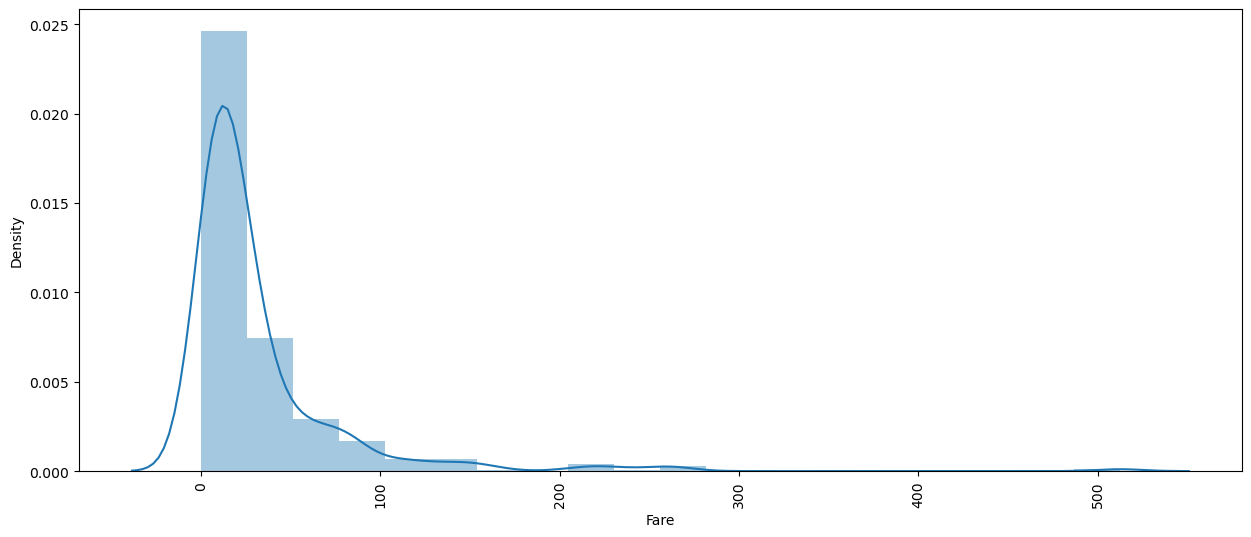

In [42]:
plt.figure(figsize=(15,6))
sns.distplot(df['Fare'],kde=True, bins=20)
plt.xticks(rotation=90)
plt.show()

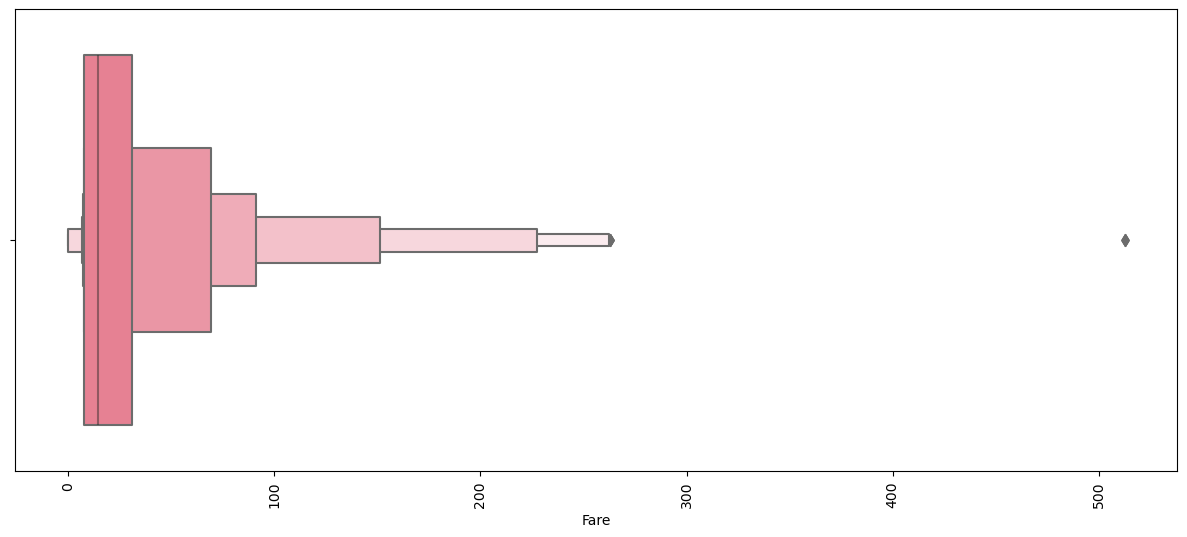

In [43]:
plt.figure(figsize=(15,6))
sns.boxenplot(x=df['Fare'], palette='husl')
plt.xticks(rotation=90)
plt.show()

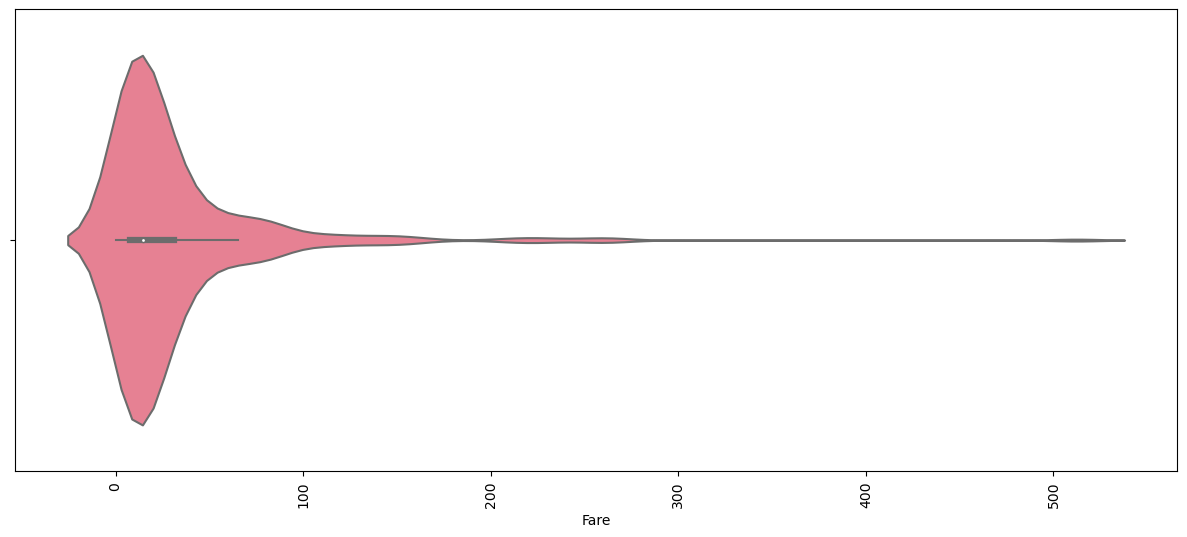

In [44]:
plt.figure(figsize=(15,6))
sns.violinplot(x=df['Fare'], palette='husl')
plt.xticks(rotation=90)
plt.show()

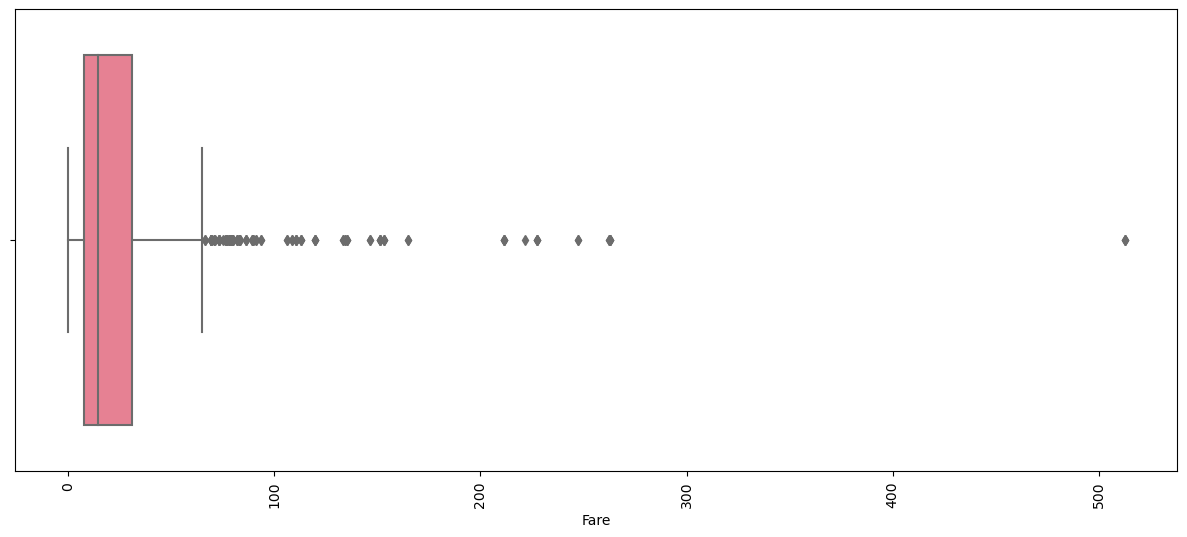

In [45]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Fare'], palette='husl')
plt.xticks(rotation=90)
plt.show()

In [46]:
df['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [47]:
df['Cabin'].value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [48]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [49]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

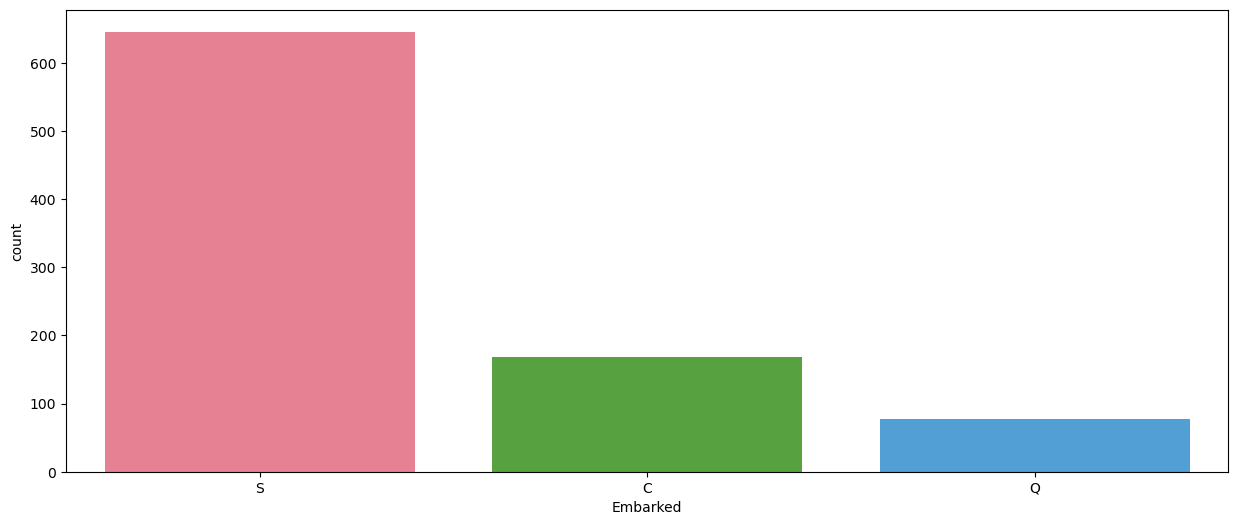

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Embarked'],palette='husl')
plt.show()

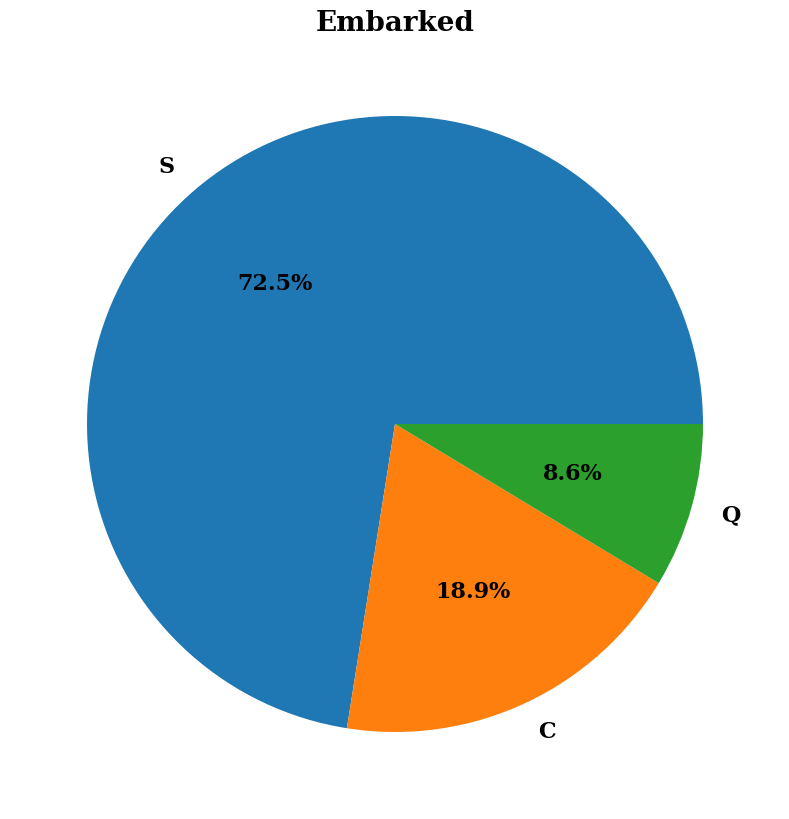

In [51]:
plt.figure(figsize=(15,10))
plt.pie(df['Embarked'].value_counts(),labels=df['Embarked'].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':16,
                                                                                                              'color':'black',
                                                                                                              'weight':'bold',
                                                                                                              'family':'serif'})
hfont={'fontname':'serif','weight':'bold'}
plt.title('Embarked',size=20,**hfont)
plt.show()

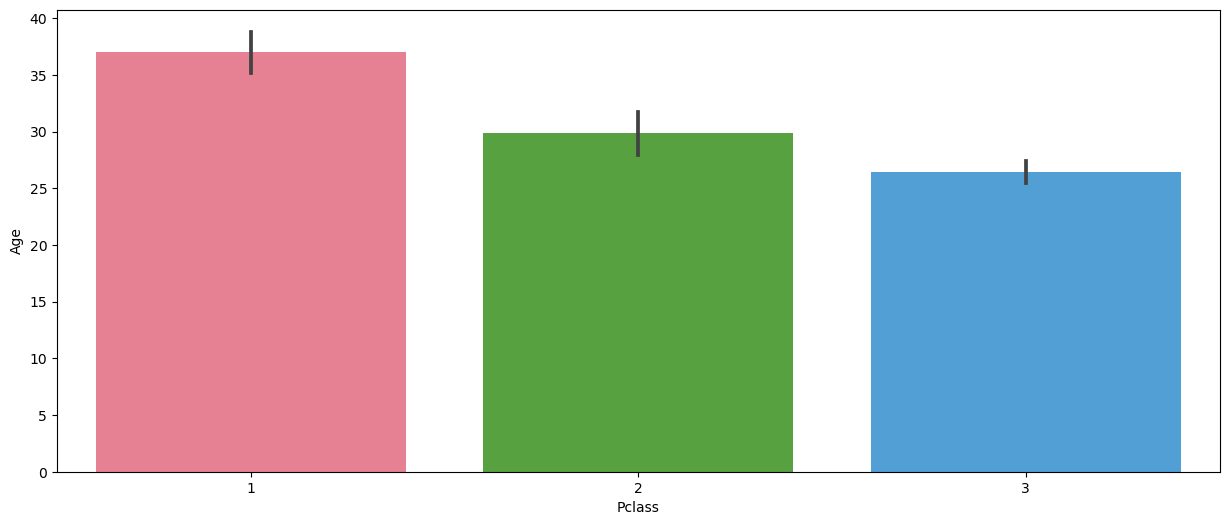

In [52]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Pclass'],y=df['Age'], palette='husl')
plt.show()

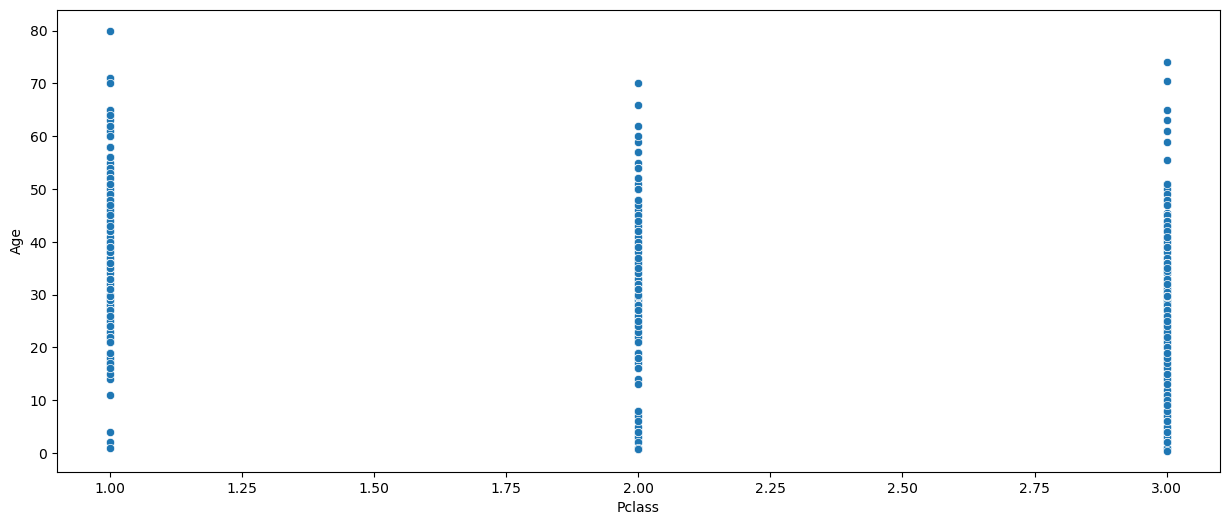

In [53]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Pclass'],y=df['Age'],palette='husl')
plt.show()

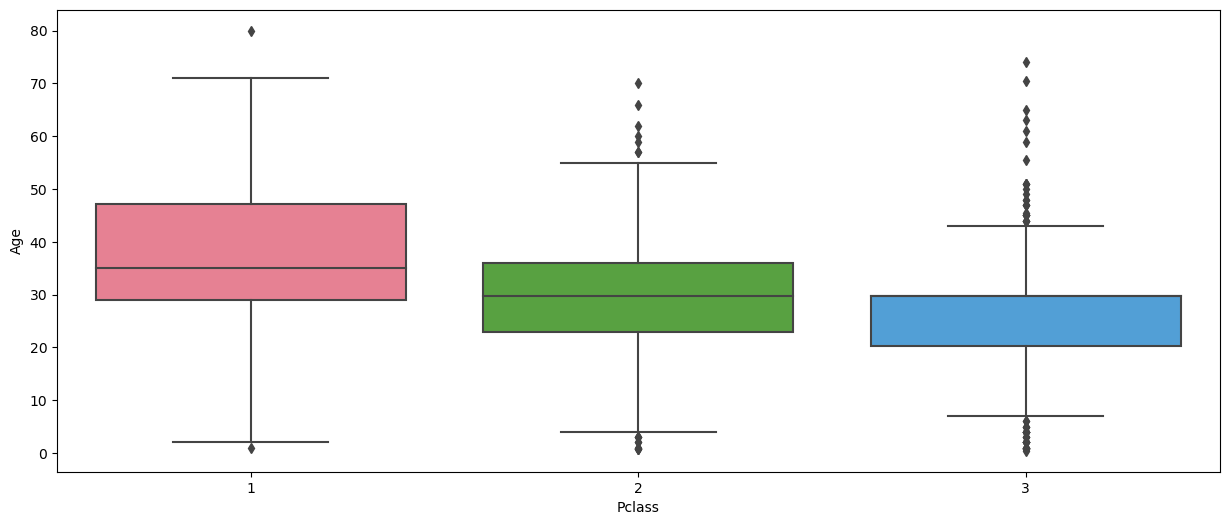

In [54]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Pclass'],y=df['Age'],palette='husl')
plt.show()

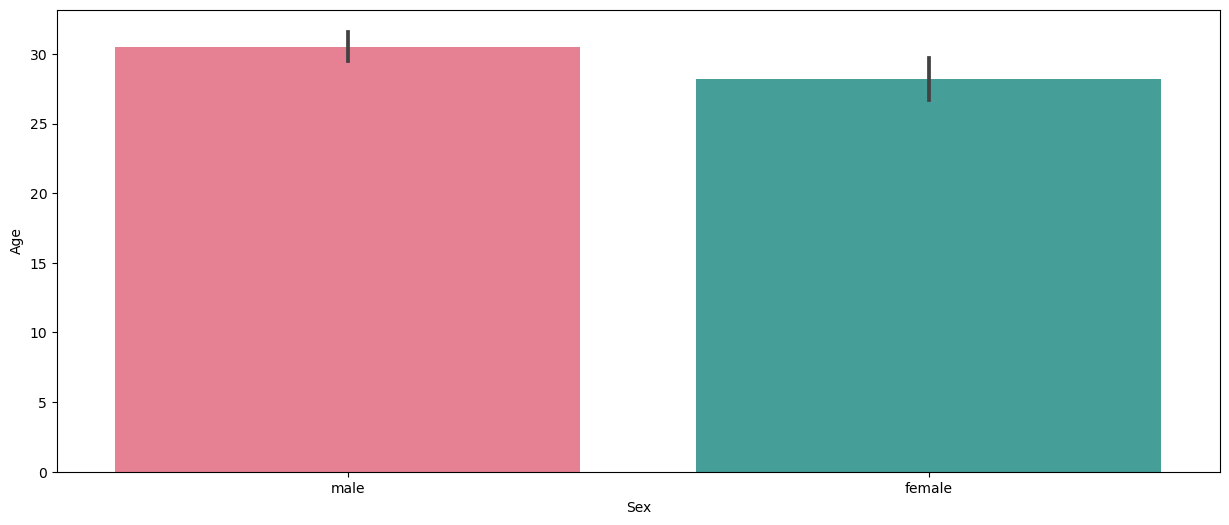

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Sex'],y=df['Age'],palette='husl')
plt.show()

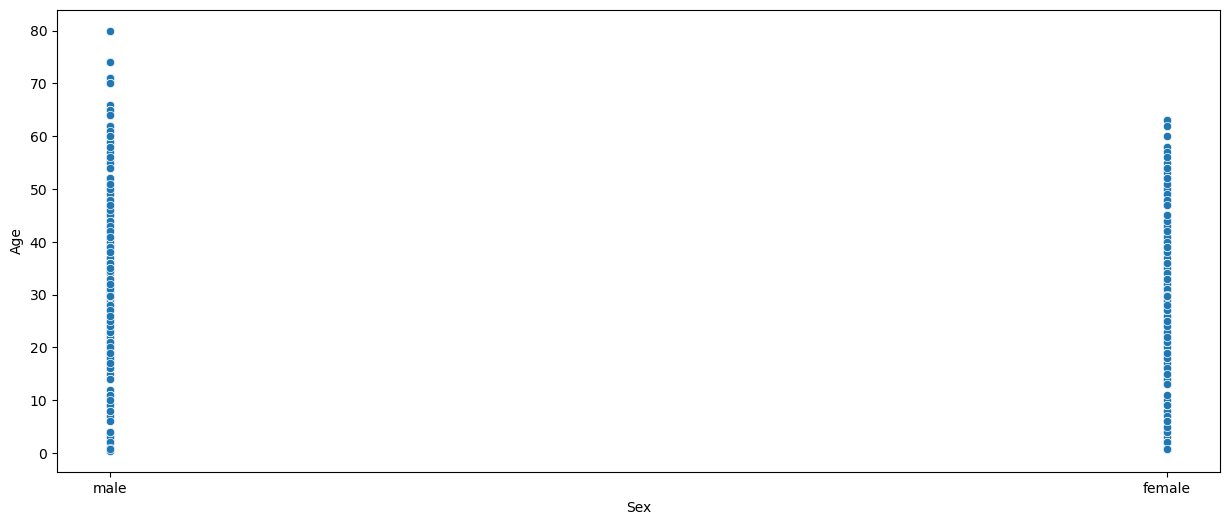

In [56]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Sex'],y=df['Age'],palette='husl')
plt.show()

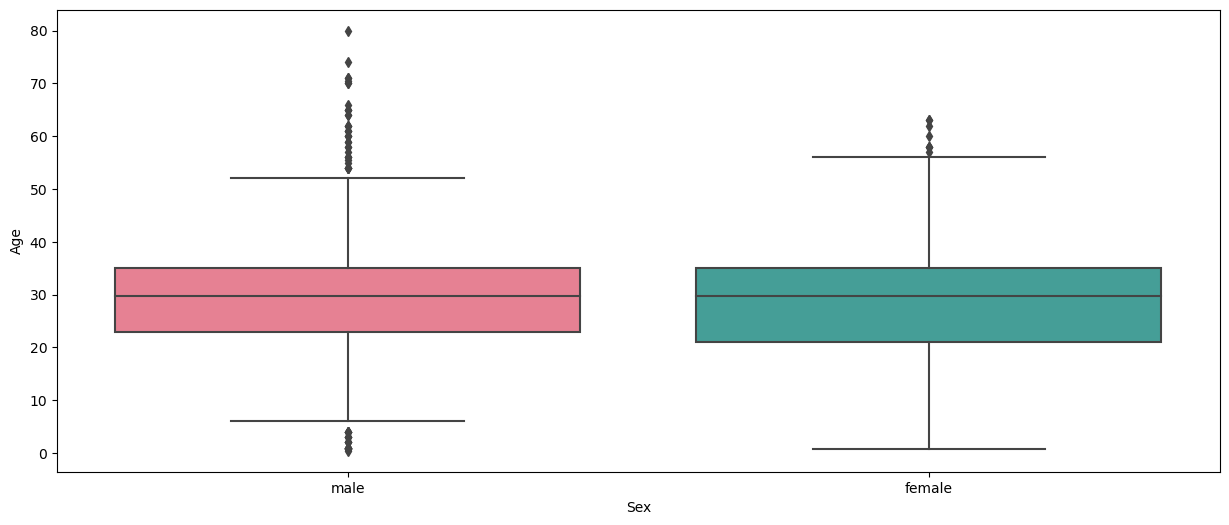

In [57]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Sex'],y=df['Age'], palette='husl')
plt.show()

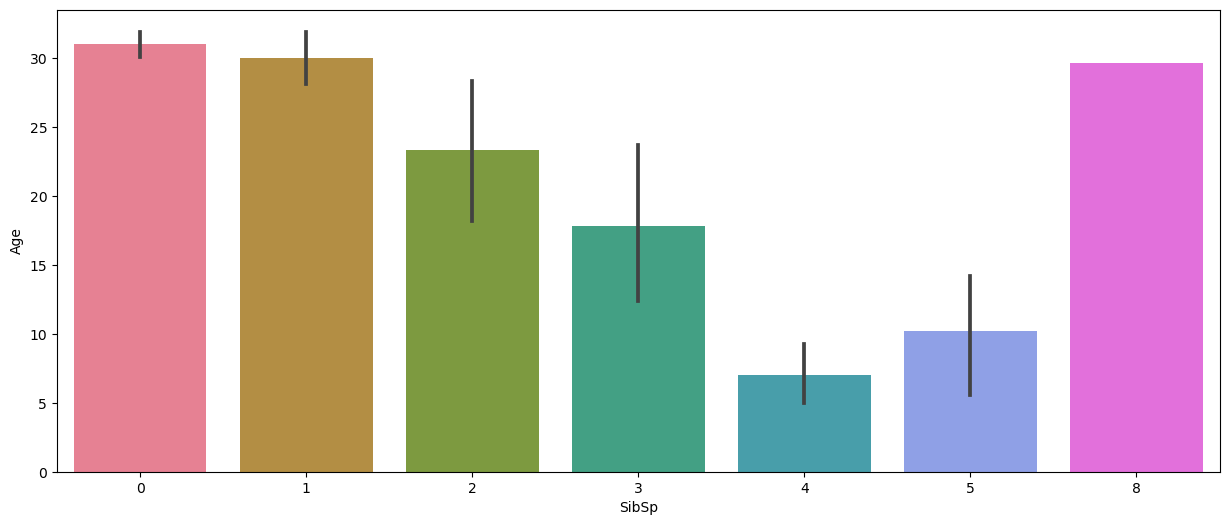

In [58]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['SibSp'],y=df['Age'],palette='husl')
plt.show()

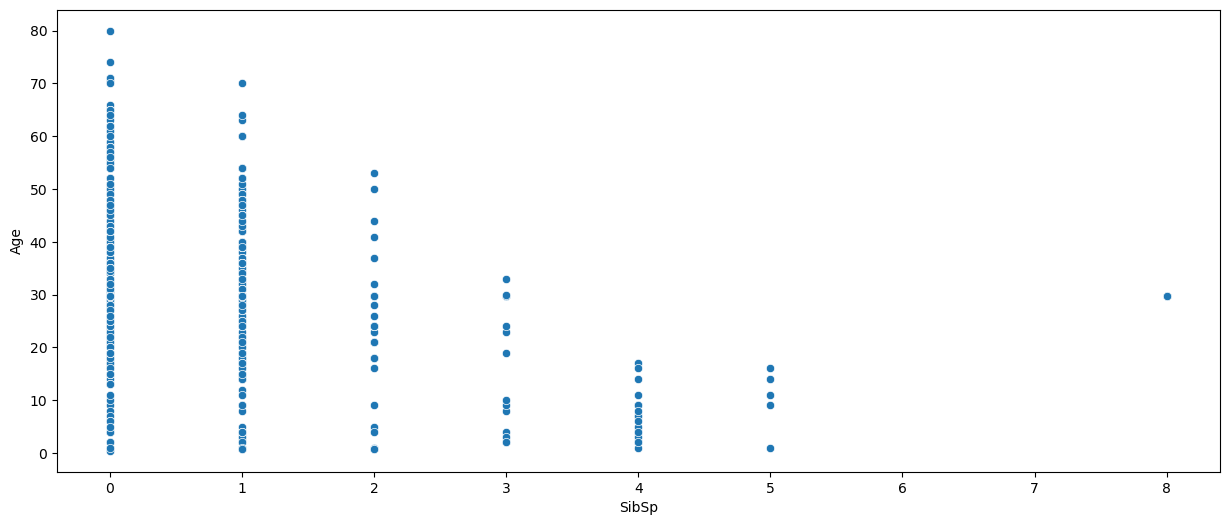

In [59]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['SibSp'],y=df['Age'],palette='husl')
plt.show()

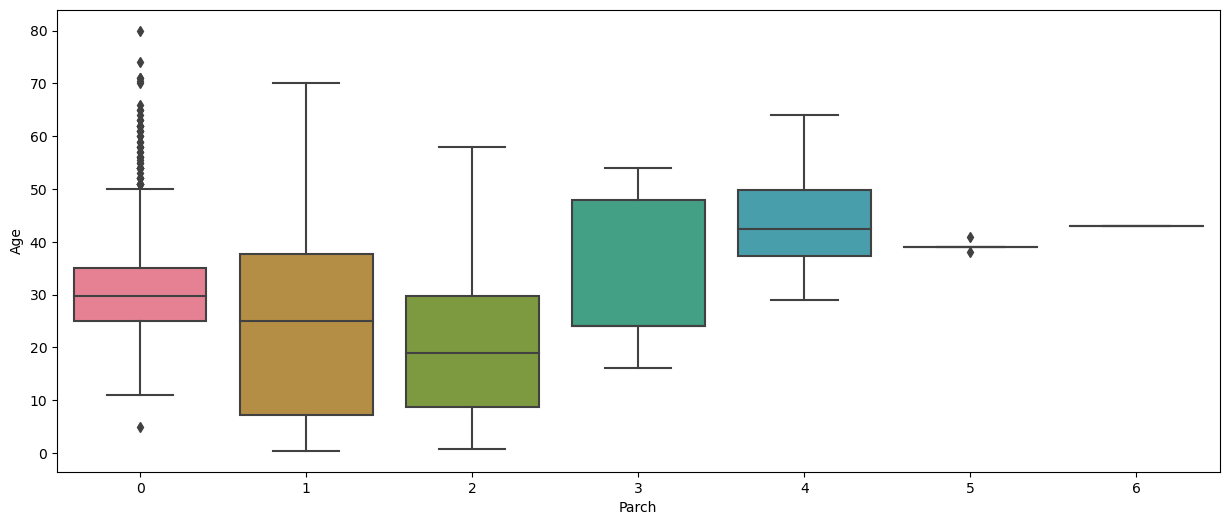

In [60]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Parch'],y=df['Age'],palette='husl')
plt.show()

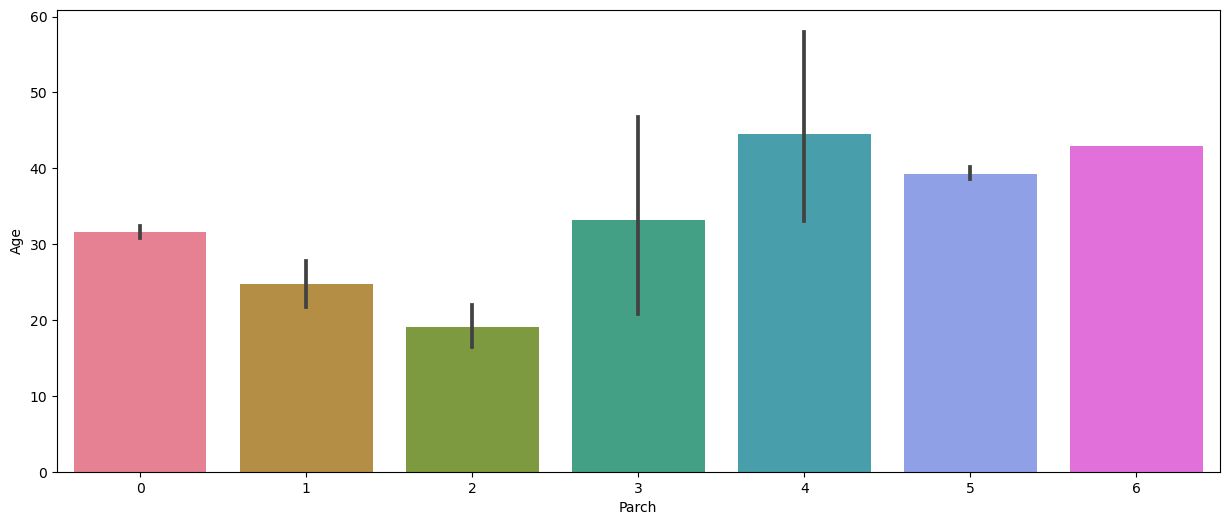

In [61]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Parch'],y=df['Age'],palette='husl')
plt.show()

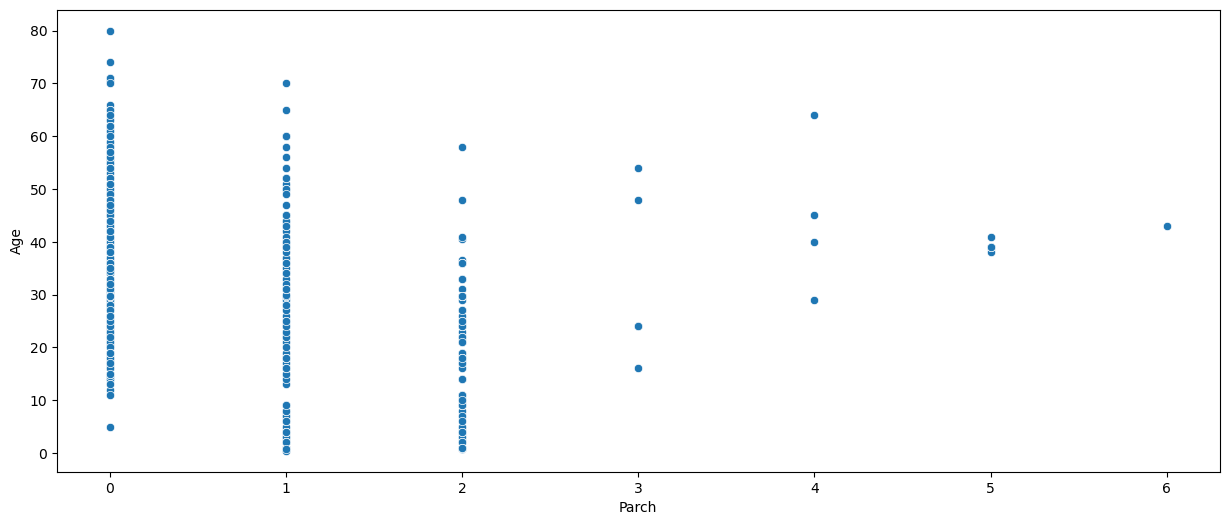

In [62]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Parch'],y=df['Age'],palette='husl')
plt.show()

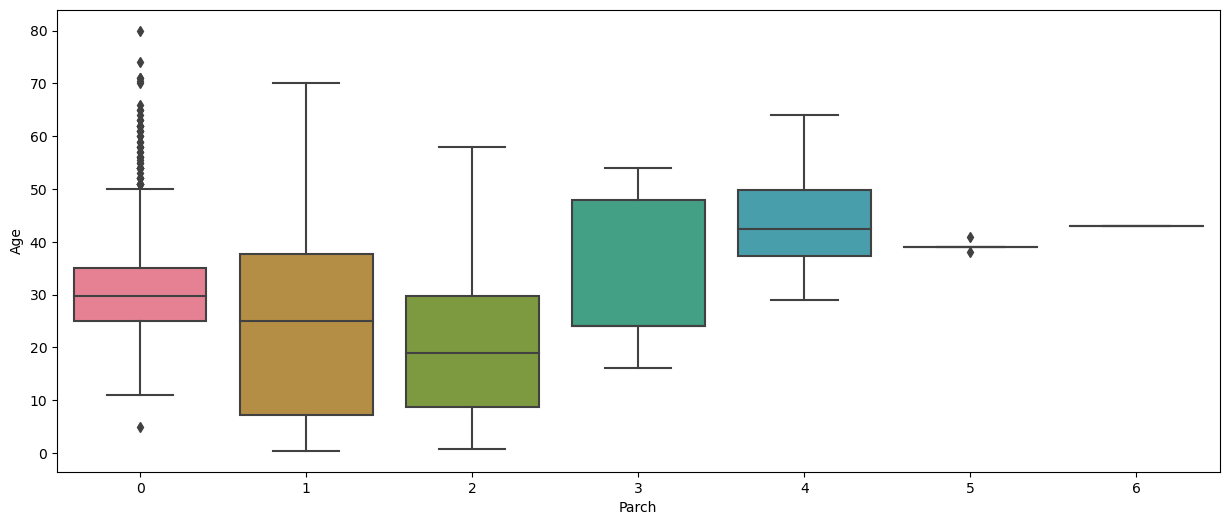

In [63]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Parch'],y=df['Age'],palette='husl')
plt.show()

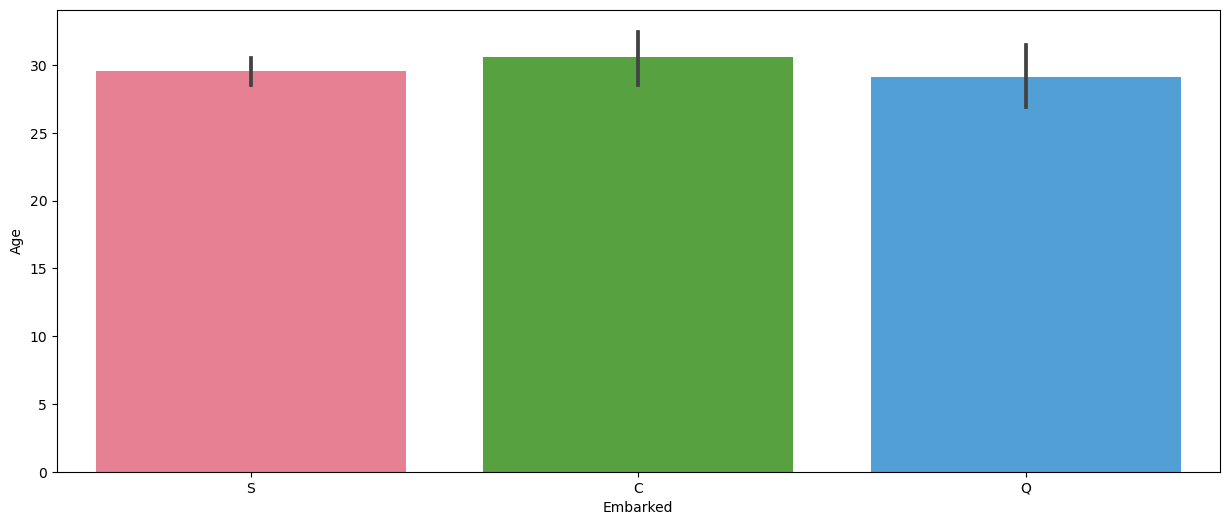

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Embarked'],y=df['Age'],palette='husl')
plt.show()

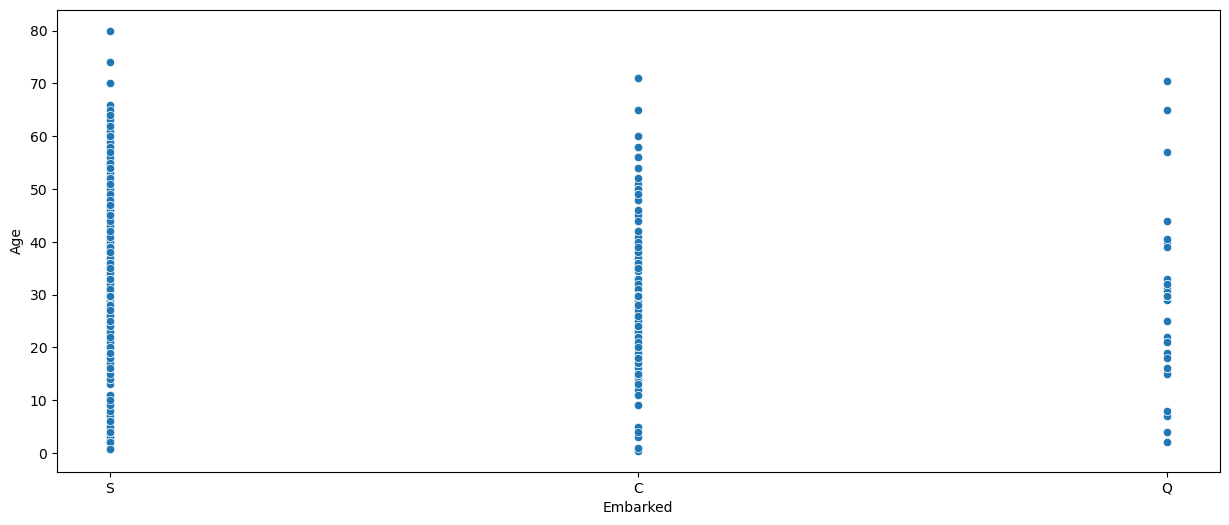

In [65]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Embarked'],y=df['Age'],palette='husl')
plt.show()

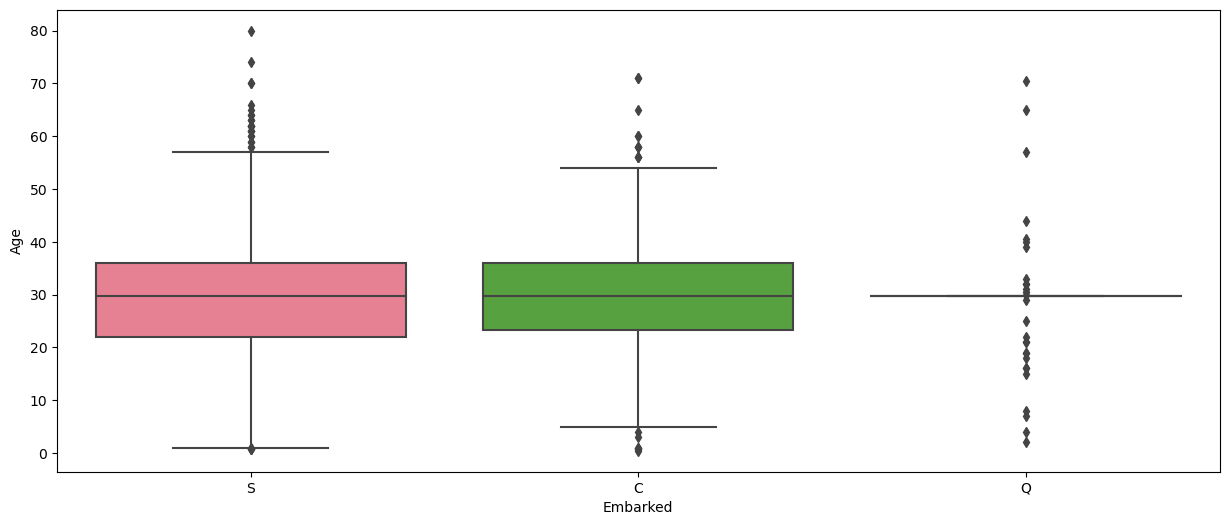

In [66]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Embarked'],y=df['Age'],palette='husl')
plt.show()

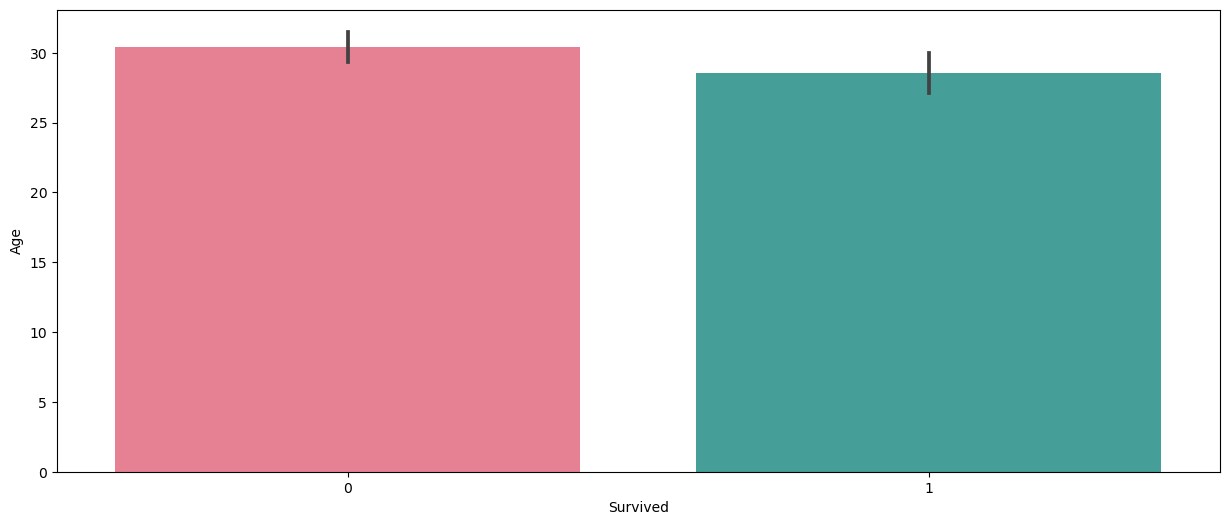

In [67]:
plt.figure(figsize=(15,6))
sns.barplot(y=df['Age'],x=df['Survived'],palette='husl')
plt.show()

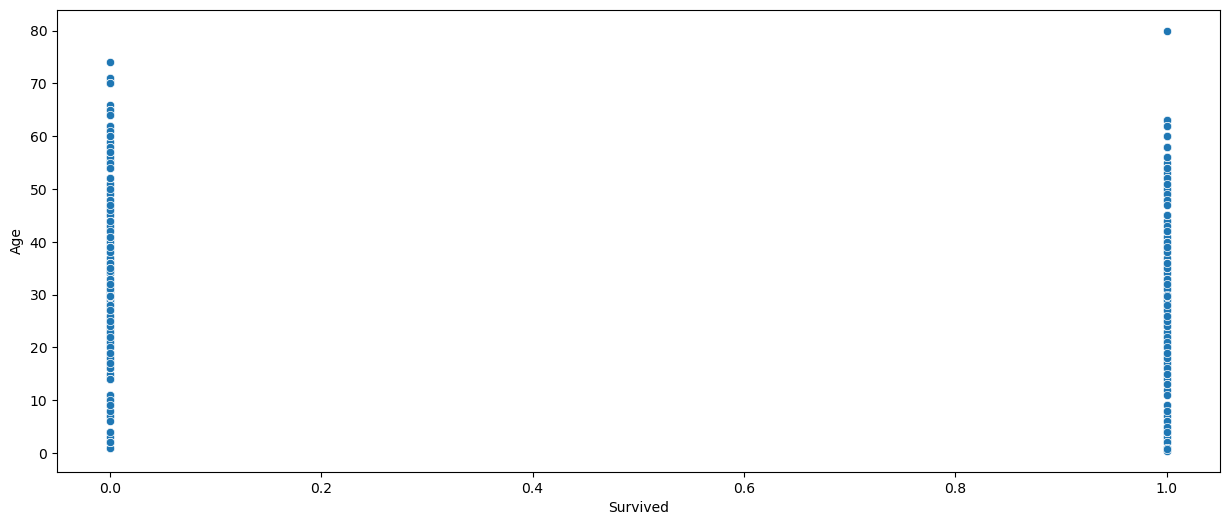

In [68]:
plt.figure(figsize=(15,6))
sns.scatterplot(y=df['Age'],x=df['Survived'],palette='husl')
plt.show()

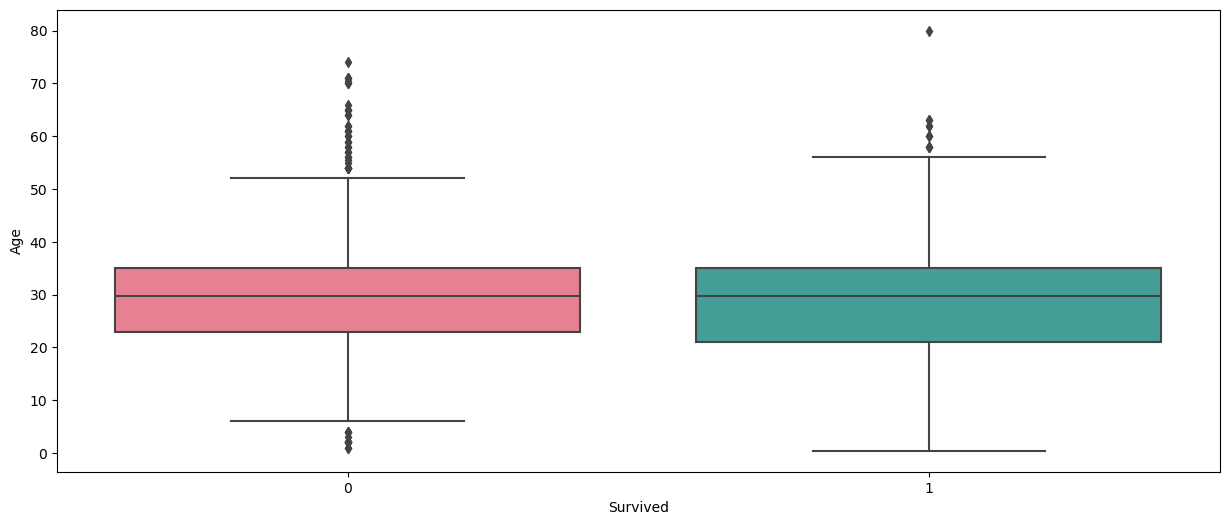

In [69]:
plt.figure(figsize=(15,6))
sns.boxplot(y=df['Age'],x=df['Survived'],palette='husl')
plt.show()

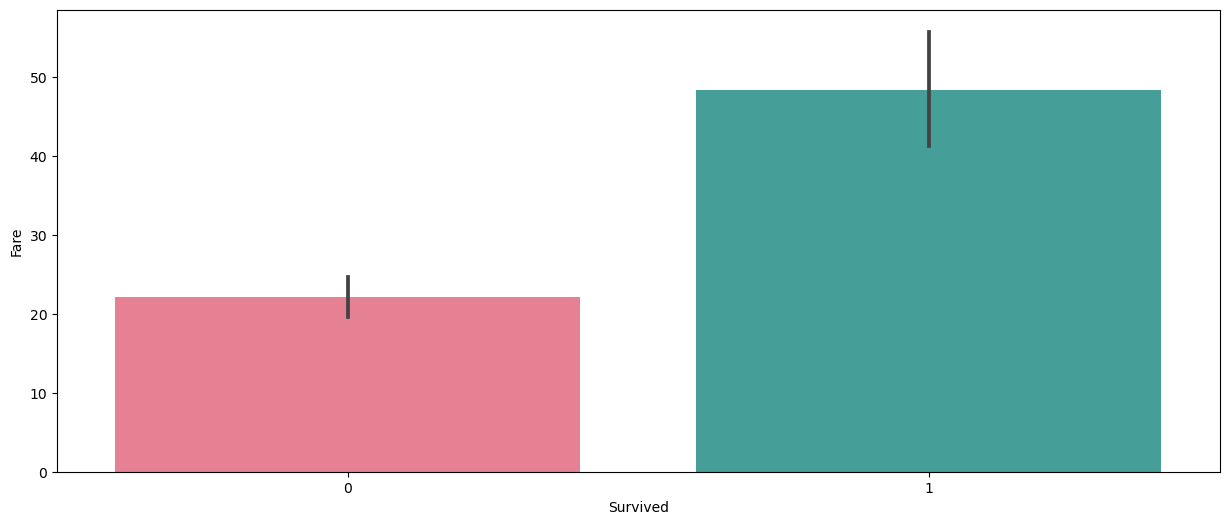

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(y=df['Fare'],x=df['Survived'],palette='husl')
plt.show()

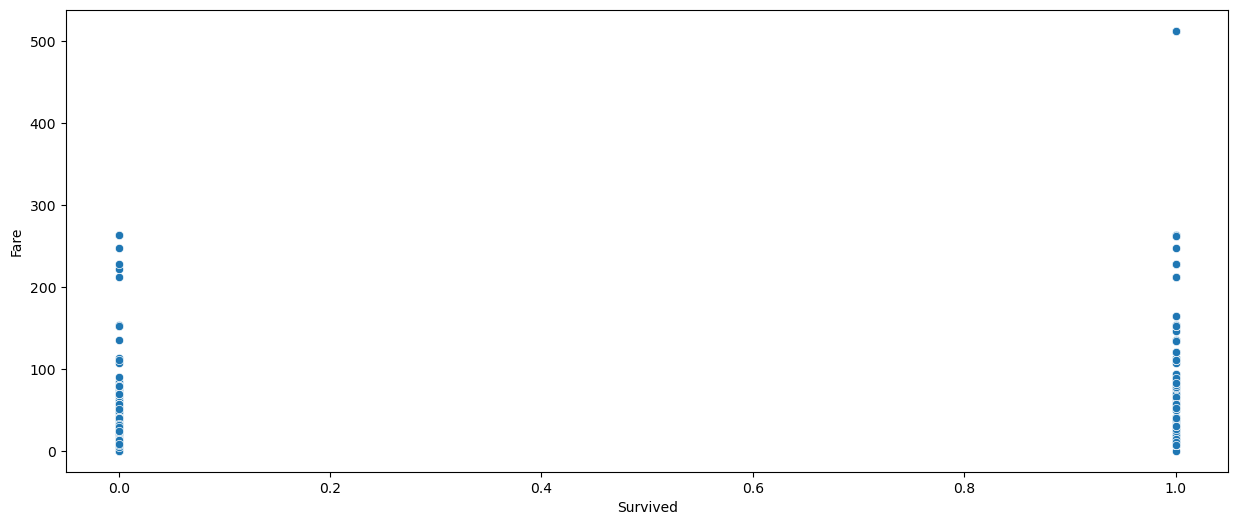

In [71]:
plt.figure(figsize=(15,6))
sns.scatterplot(y=df['Fare'],x=df['Survived'],palette='husl')
plt.show()

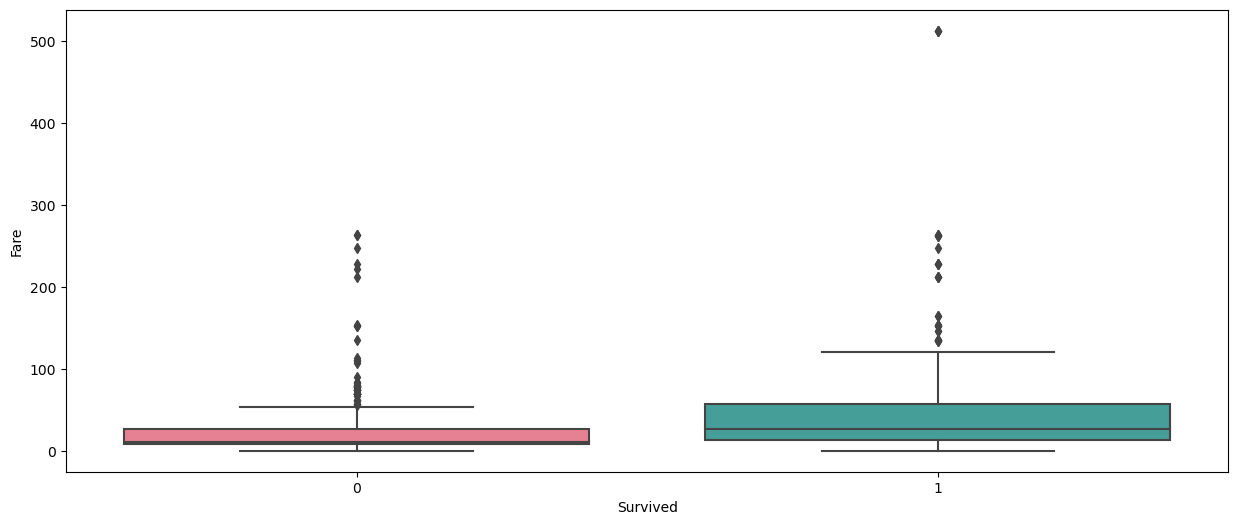

In [72]:
plt.figure(figsize=(15,6))
sns.boxplot(y=df['Fare'],x=df['Survived'],palette='husl')
plt.show()

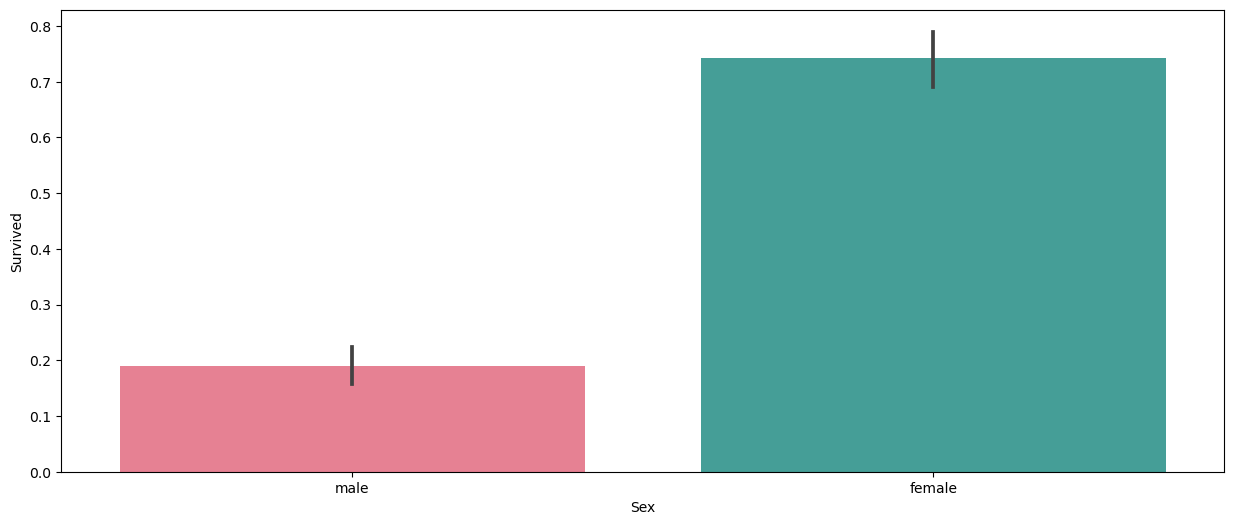

In [73]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Sex'],y=df['Survived'],palette='husl')
plt.show()

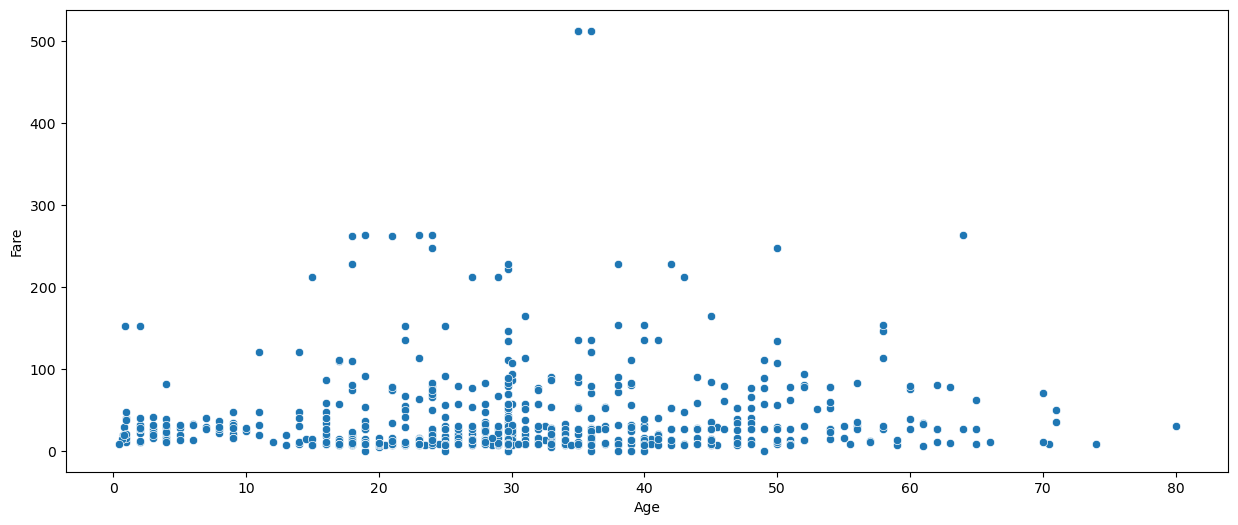

In [74]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Age'],y=df['Fare'],palette='husl')
plt.show()

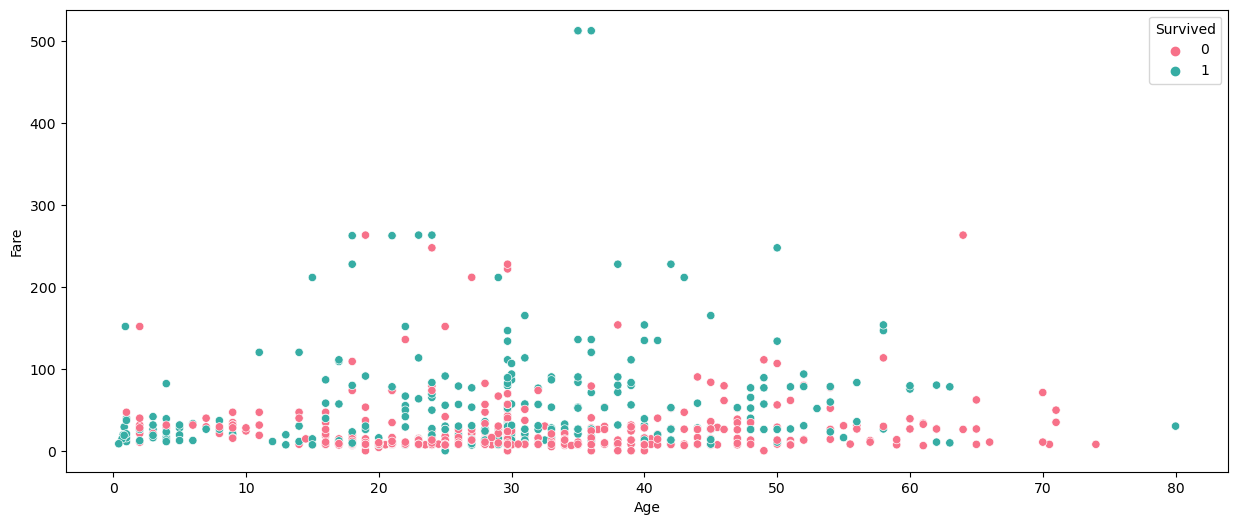

In [75]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Age'],y=df['Fare'],hue=df['Survived'],palette='husl')
plt.show()

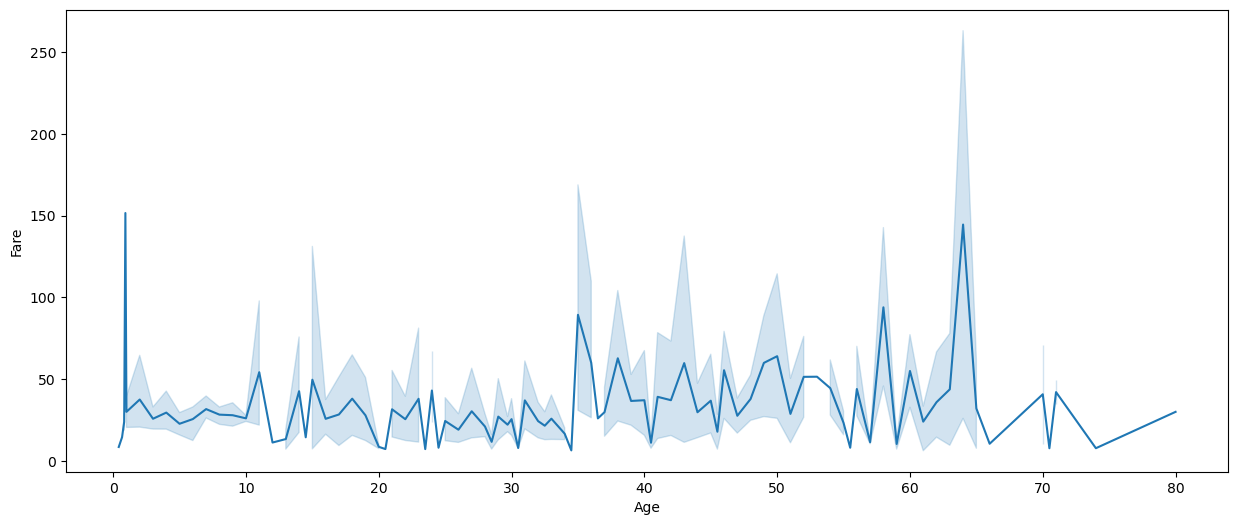

In [76]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df['Age'],y=df['Fare'],palette='husl')
plt.show()

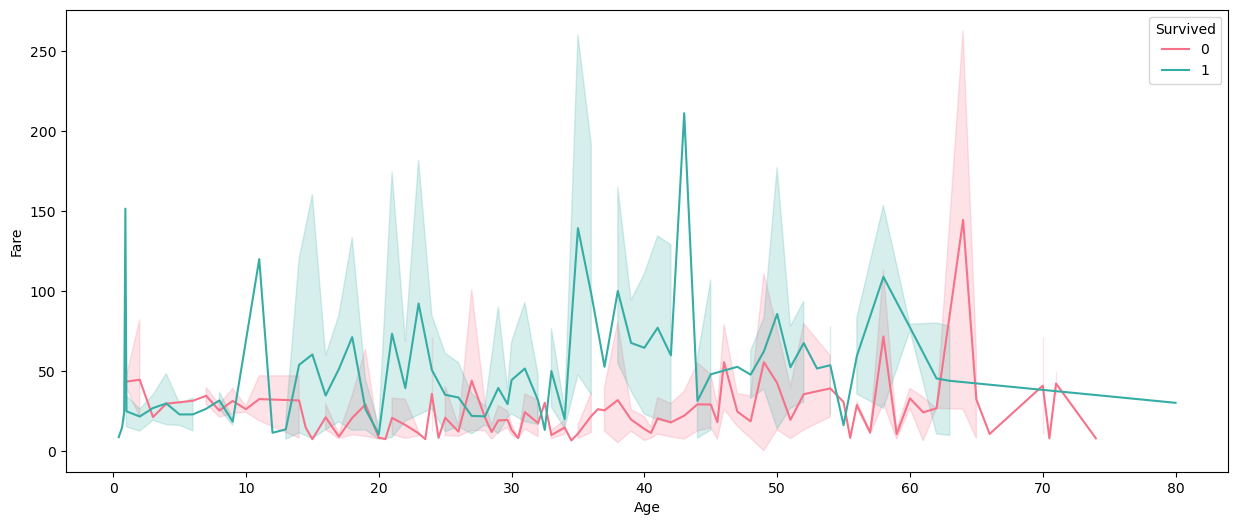

In [77]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df['Age'],y=df['Fare'],hue=df['Survived'],palette='husl')
plt.show()

In [78]:
pd.pivot_table(df,index='Survived',values=['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


In [79]:
Pclass=df['Pclass'].value_counts(normalize=True)
Pclass=pd.DataFrame(Pclass)
Pclass=Pclass.reset_index()
Pclass=Pclass.rename(columns={'index':'Class','Pclass':'% of passenger'})
Pclass=Pclass.sort_values(by='Class')
Pclass['% of passenger']=Pclass['% of passenger']*100
Pclass['% of passenger']=np.round(Pclass['% of passenger'],2)
display(Pclass)


,Class,% of passenger
1,1,24.24
2,2,20.65
0,3,55.11


In [80]:
Cabin=df['Ticket'].value_counts(normalize=True)
Cabin=pd.DataFrame(Cabin)
Cabin=Cabin.reset_index()
Cabin=Cabin.rename(columns={'index':'Ticket','Ticket':'% of passenger'})

Cabin['% of passenger']=Cabin['% of passenger']*100
Cabin['% of passenger']=np.round(Cabin['% of passenger'],2)
display(Cabin)

,Ticket,% of passenger
0,347082,0.79
1,CA. 2343,0.79
2,1601,0.79
3,3101295,0.67
4,CA 2144,0.67
...,...,...
676,9234,0.11
677,19988,0.11
678,2693,0.11
679,PC 17612,0.11


In [81]:
Cabin=df['Cabin'].value_counts(normalize=True)
Cabin=pd.DataFrame(Cabin)
Cabin=Cabin.reset_index()
Cabin=Cabin.rename(columns={'index':'Cabin','Cabin':'% of passenger'})

Cabin['% of passenger']=Cabin['% of passenger']*100
Cabin['% of passenger']=np.round(Cabin['% of passenger'],2)
display(Cabin)

,Cabin,% of passenger
0,B96 B98,77.55
1,G6,0.45
2,C23 C25 C27,0.45
3,C22 C26,0.34
4,F33,0.34
...,...,...
142,E34,0.11
143,C7,0.11
144,C54,0.11
145,E36,0.11


In [82]:
df_new=df.copy()

In [83]:
df_new.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [84]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [85]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [86]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])

In [87]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [88]:
df_corr=df.corr()

In [89]:
df_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


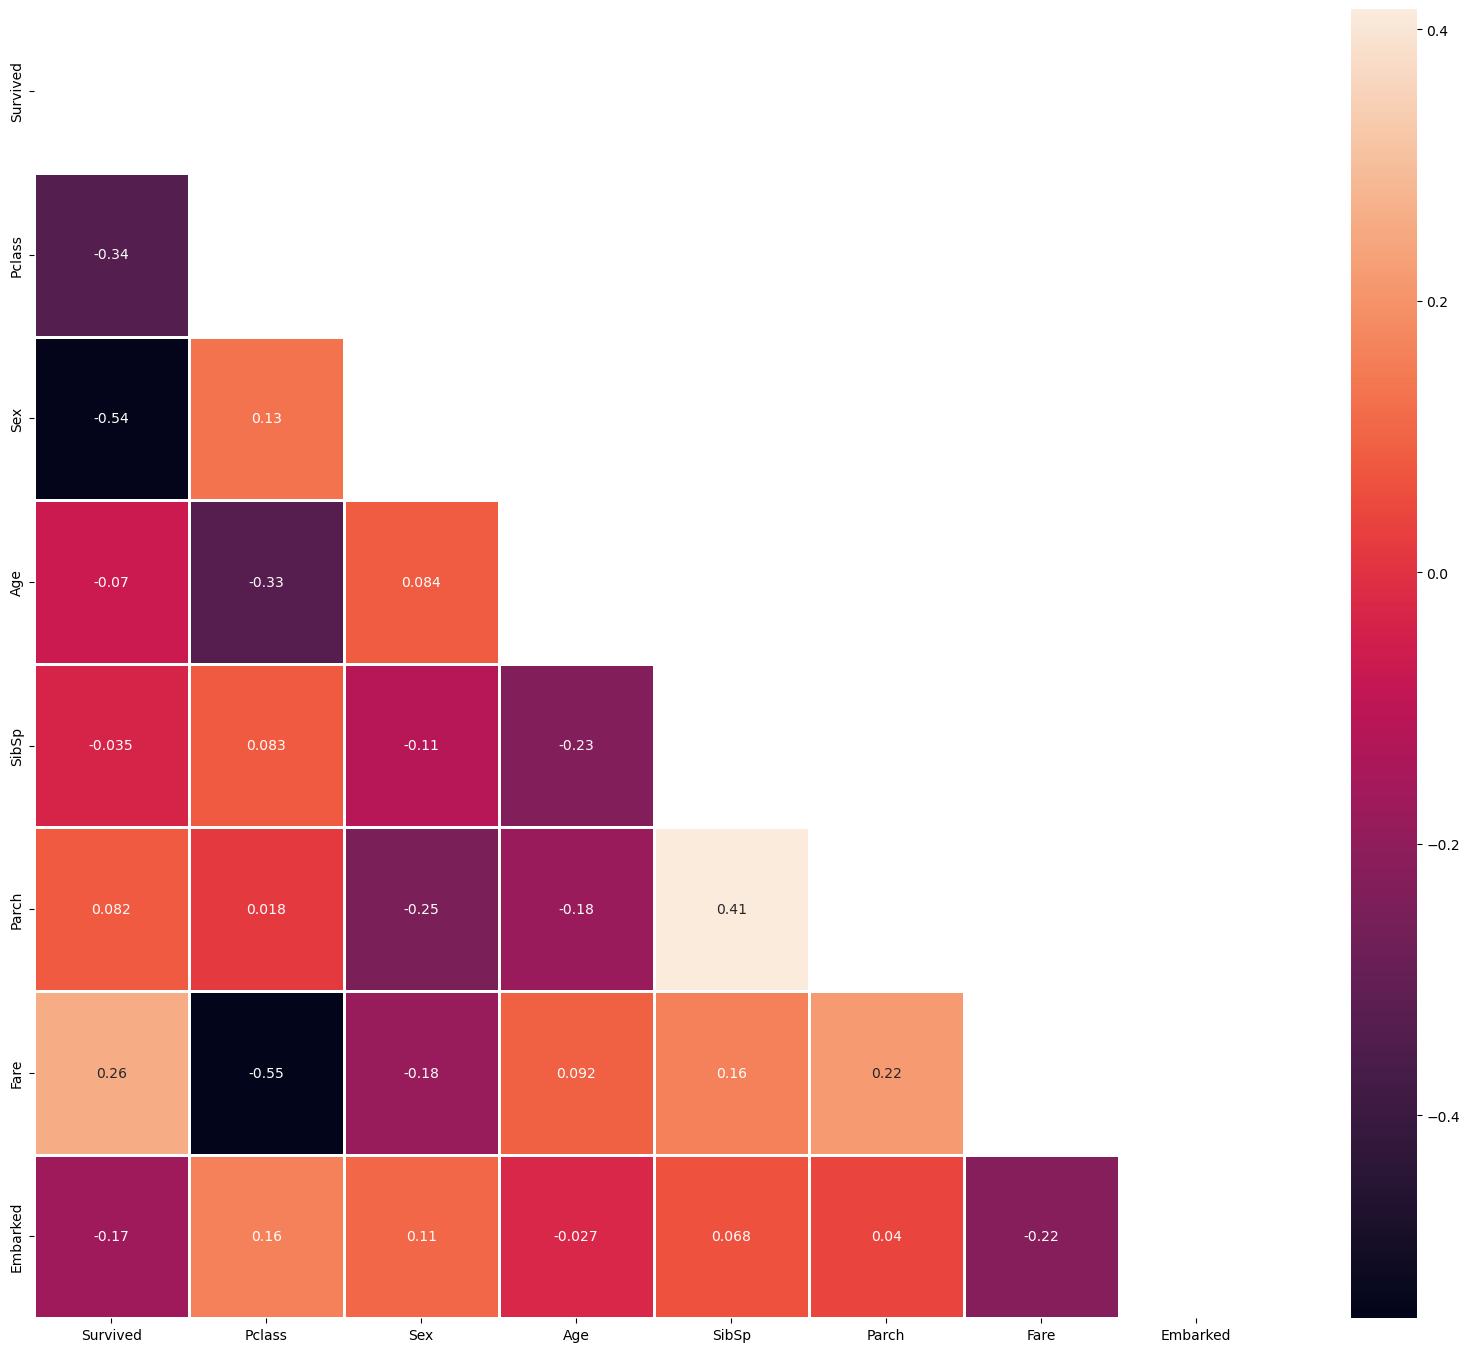

In [90]:
plt.figure(figsize=(20,17))
matrix=np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=0.8, mask=matrix, cmap='rocket');
plt.show()

(array([[891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [113., 542., 179.,  50.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0

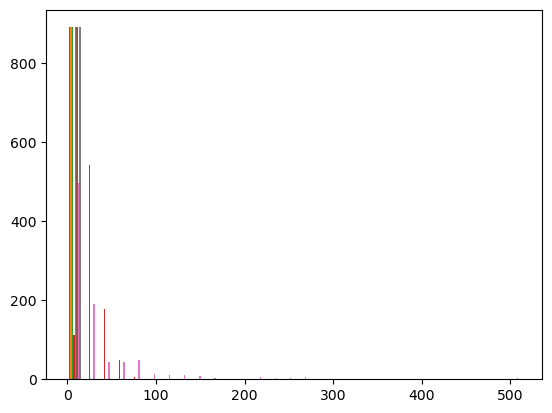

In [91]:
plt.hist(df,bins=30)

In [92]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [93]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [94]:
 x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=40)

In [95]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred=logreg.predict(x_test)

In [97]:
#calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

#calculate precision
precision=precision_score(y_test,y_pred)

print(precision)

# calculate recall
recall=recall_score(y_test,y_pred)

print(recall)

#calculate f1 score
f1=f1_score(y_test,y_pred)

print(f1)

#calculate confusion matrix
cm=confusion_matrix(y_test,y_pred)

print(cm)

y_prob=logreg.predict_proba(x_test)

0.7982062780269058
0.7717391304347826
0.7473684210526316
0.7593582887700535
[[107  21]
 [ 24  71]]


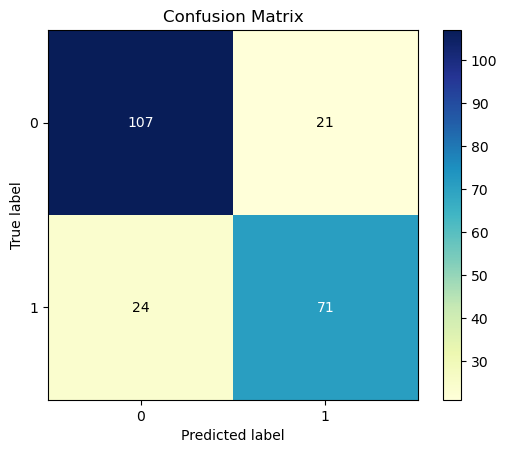

In [98]:
plot_confusion_matrix(y_test,y_pred,cmap='YlGnBu')
plt.show()

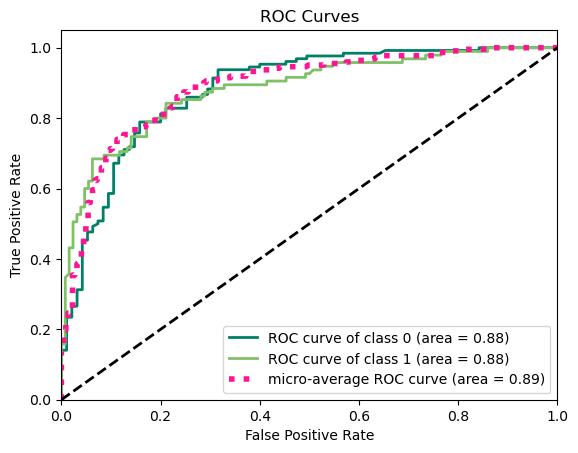

In [99]:
plot_roc(y_test,y_prob,plot_macro=False,cmap='summer')
plt.show()

In [100]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [101]:
y_pred=model.predict(x_test)

In [102]:
#calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

#calculate precision
precision=precision_score(y_test,y_pred)

print(precision)

# calculate recall
recall=recall_score(y_test,y_pred)

print(recall)

#calculate f1 score
f1=f1_score(y_test,y_pred)

print(f1)

#calculate confusion matrix
cm=confusion_matrix(y_test,y_pred)

print(cm)

y_prob=logreg.predict_proba(x_test)

0.7802690582959642
0.7555555555555555
0.7157894736842105
0.7351351351351352
[[106  22]
 [ 27  68]]


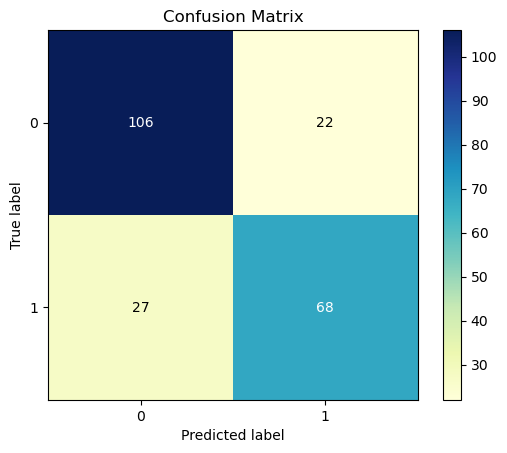

In [103]:
plot_confusion_matrix(y_test,y_pred,cmap='YlGnBu')
plt.show()

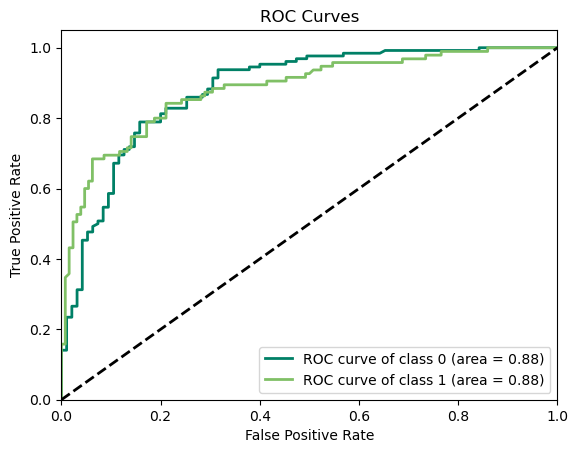

In [104]:
plot_roc(y_test,y_prob,plot_micro=False,plot_macro=False,cmap='summer')
plt.show()